<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date: Jan. 30 2023</small><br/>
    <small>Section: Thursday 11:30am</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Connor Davin CJD 3 Hours| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

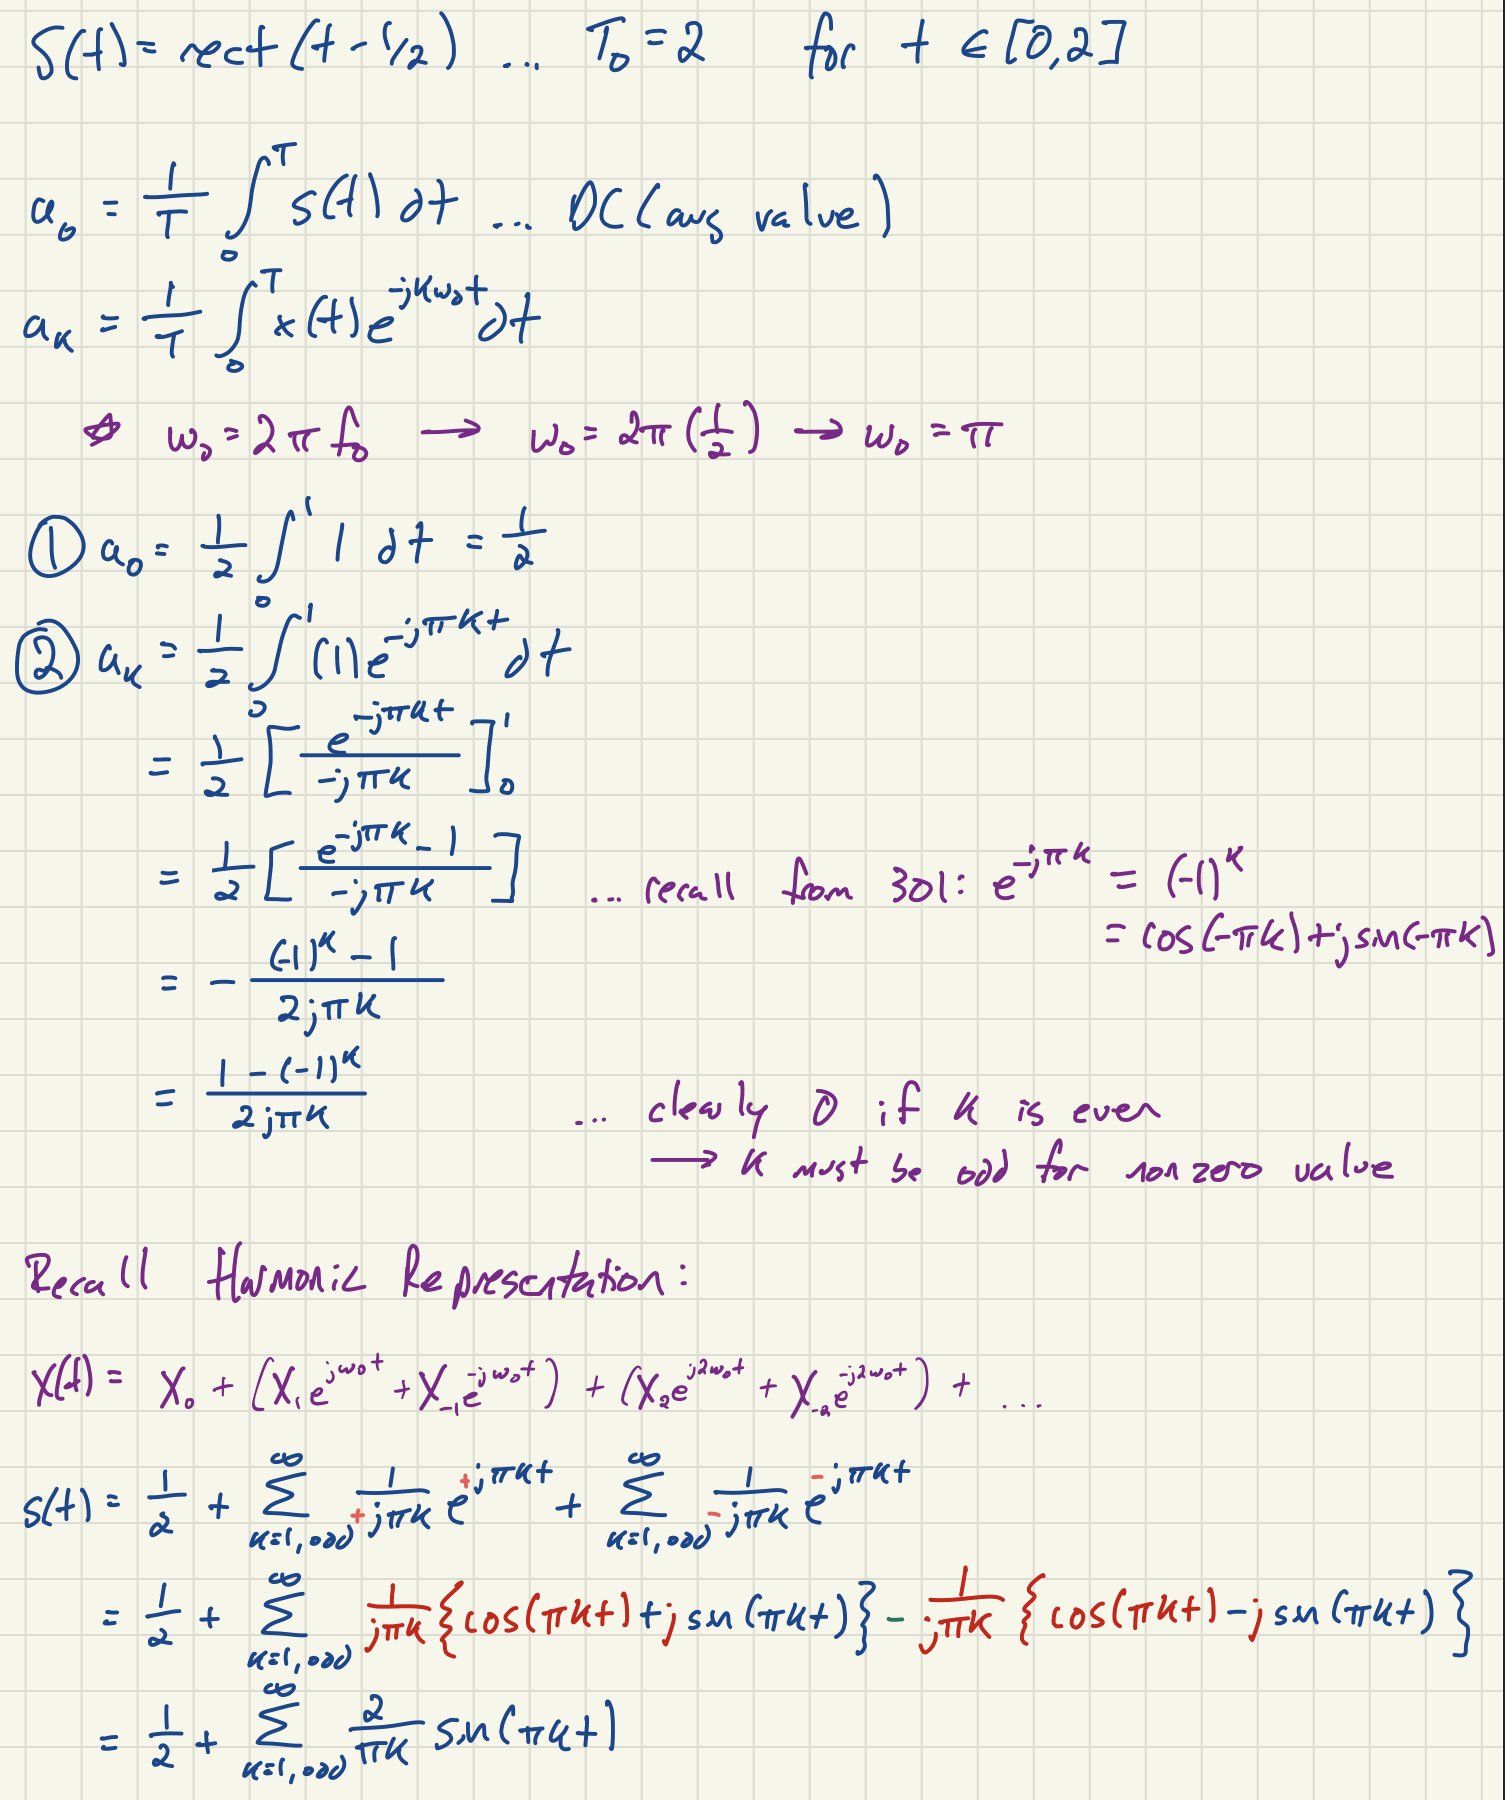

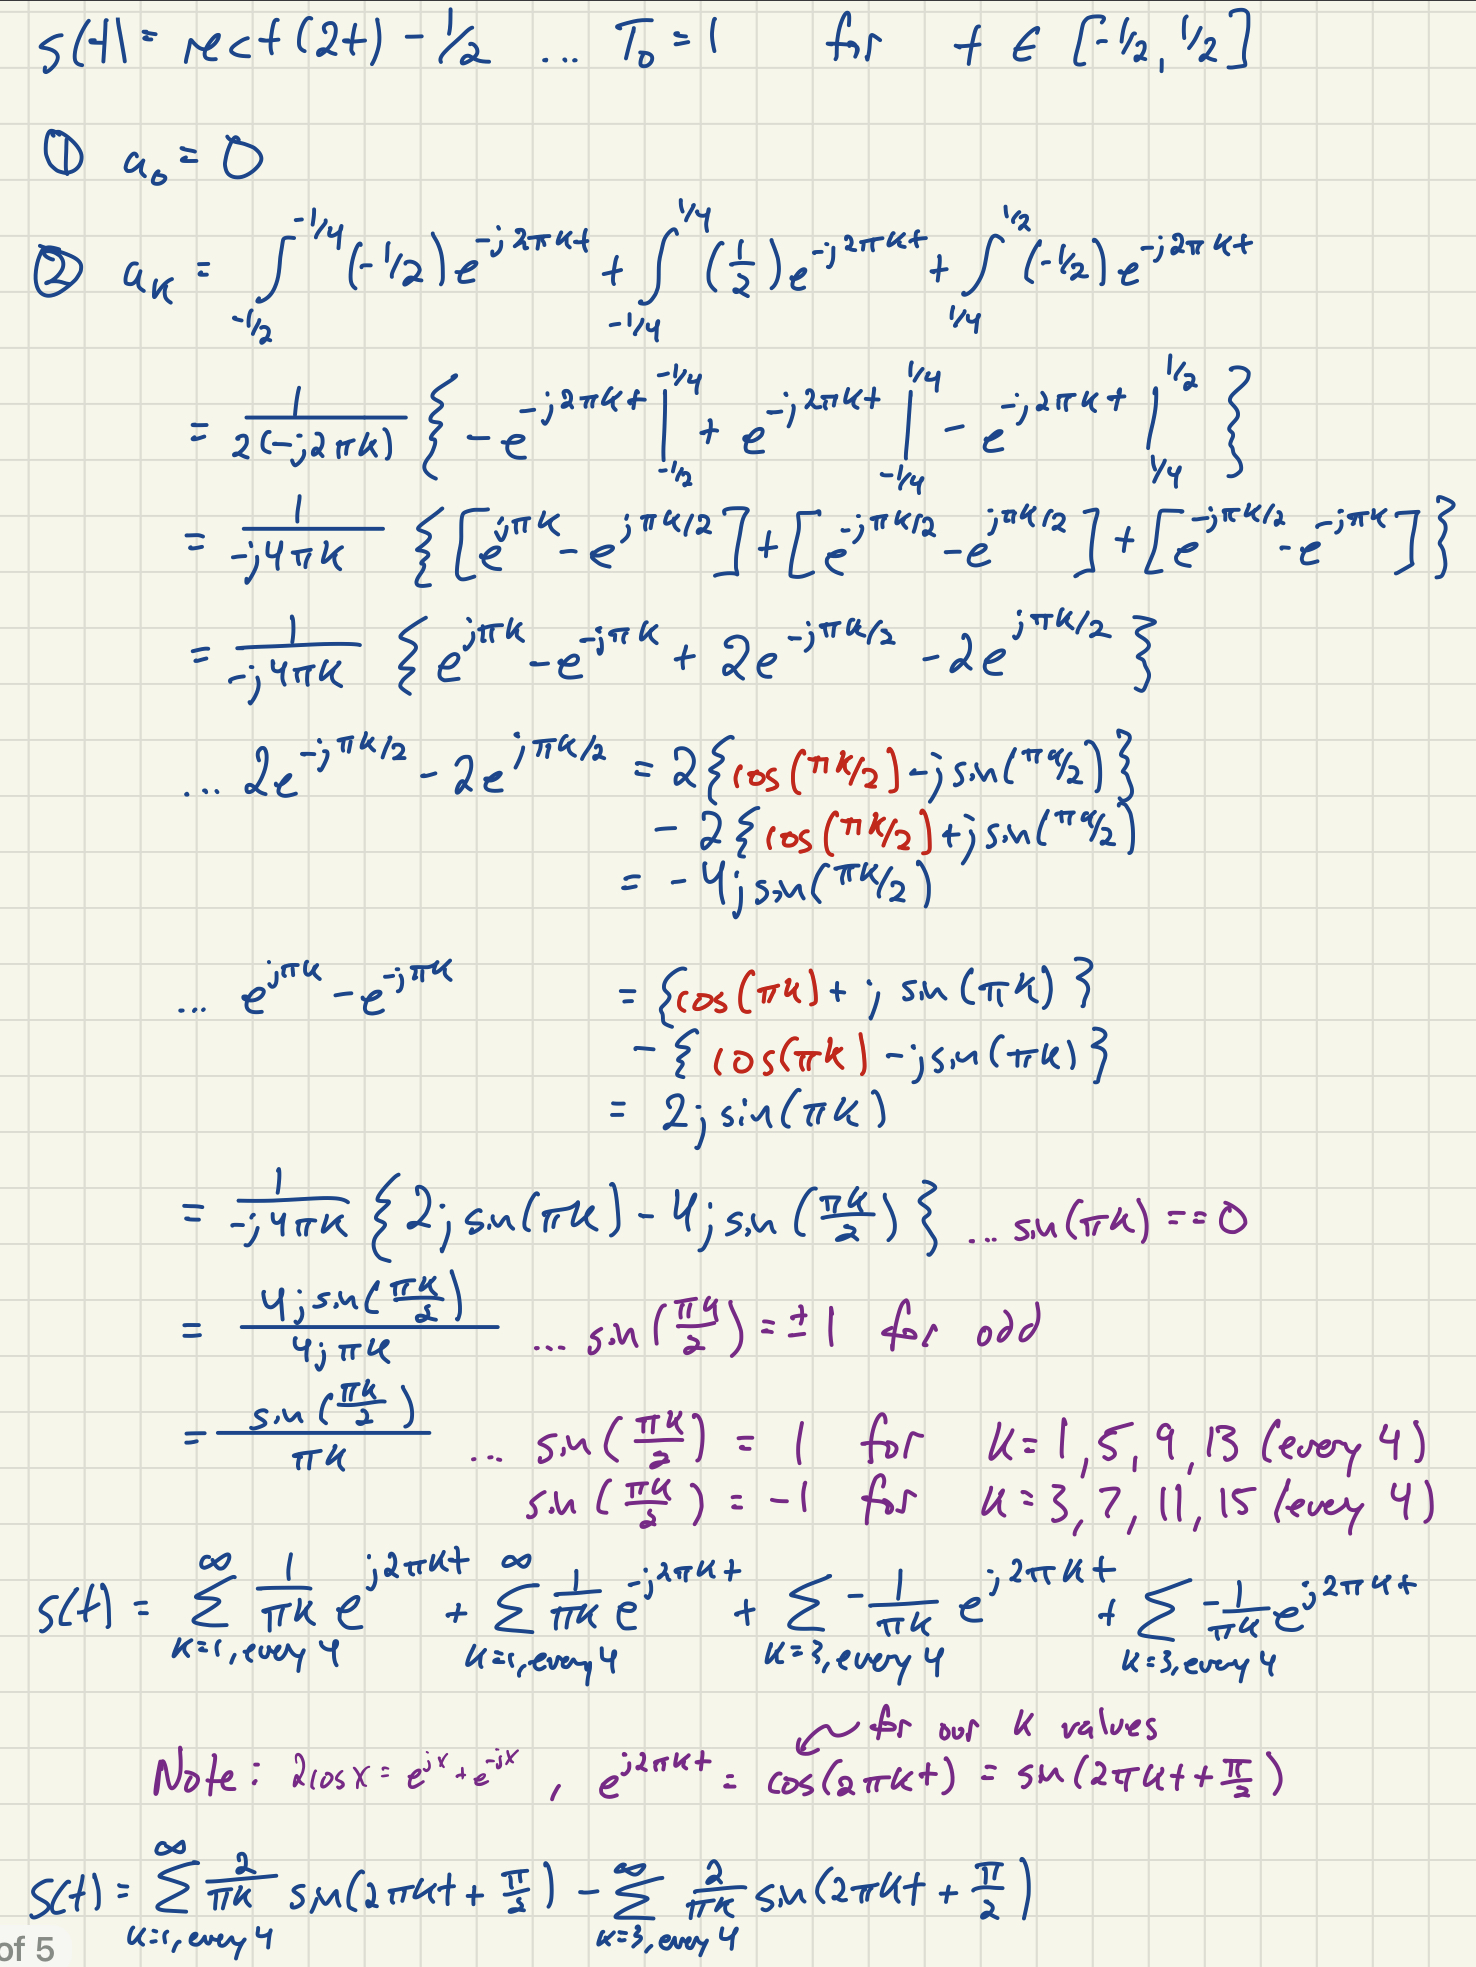

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

Text(0.5, 0, 't')

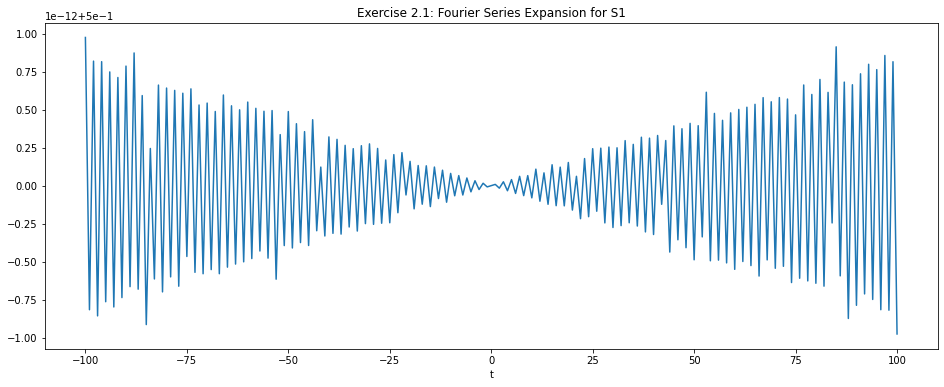

In [47]:
t = np.linspace(-100, 100, 201)
i = np.arange(1, 201, 2) # 1 to 200 odd num

s1 = 0.5;
for k in i:
  s1 += ( 2 / (np.pi*k) ) * np.sin(np.pi * k * t)

plt.plot(t,s1)
plt.title("Exercise 2.1: Fourier Series Expansion for S1")
plt.xlabel("t")

Text(0.5, 0, 't')

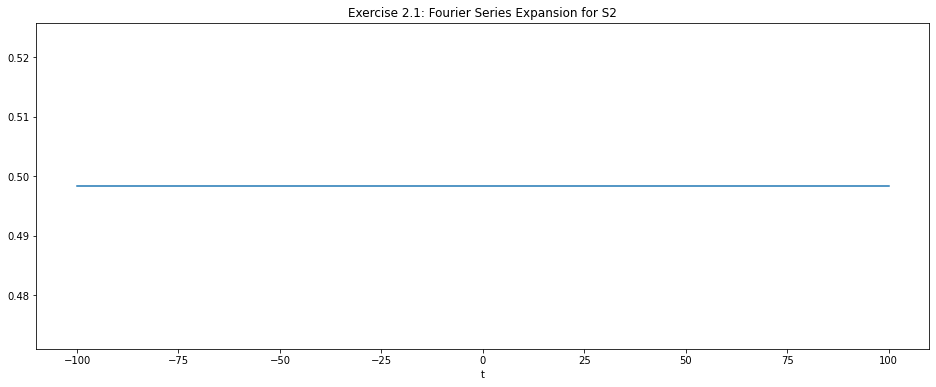

In [48]:
t = np.linspace(-100, 100, 201)
i = np.arange(1, 201, 2)

s2 = 0
for k in i:
  # only need logic for odd values as i is only odd value
  if( (k-1) % 4 == 0): # ... % 2 does not work, must use % 4  
    s2 += ( 2 / (np.pi*k)) * np.sin(2*np.pi*k*t+(np.pi/2))
  else:
    s2 -= (2 / (np.pi*k)) * np.sin(2*np.pi*k*t+(np.pi/2))

plt.plot(t,s2)
plt.title("Exercise 2.1: Fourier Series Expansion for S2")
plt.xlabel("t")

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

Case 1: Default 

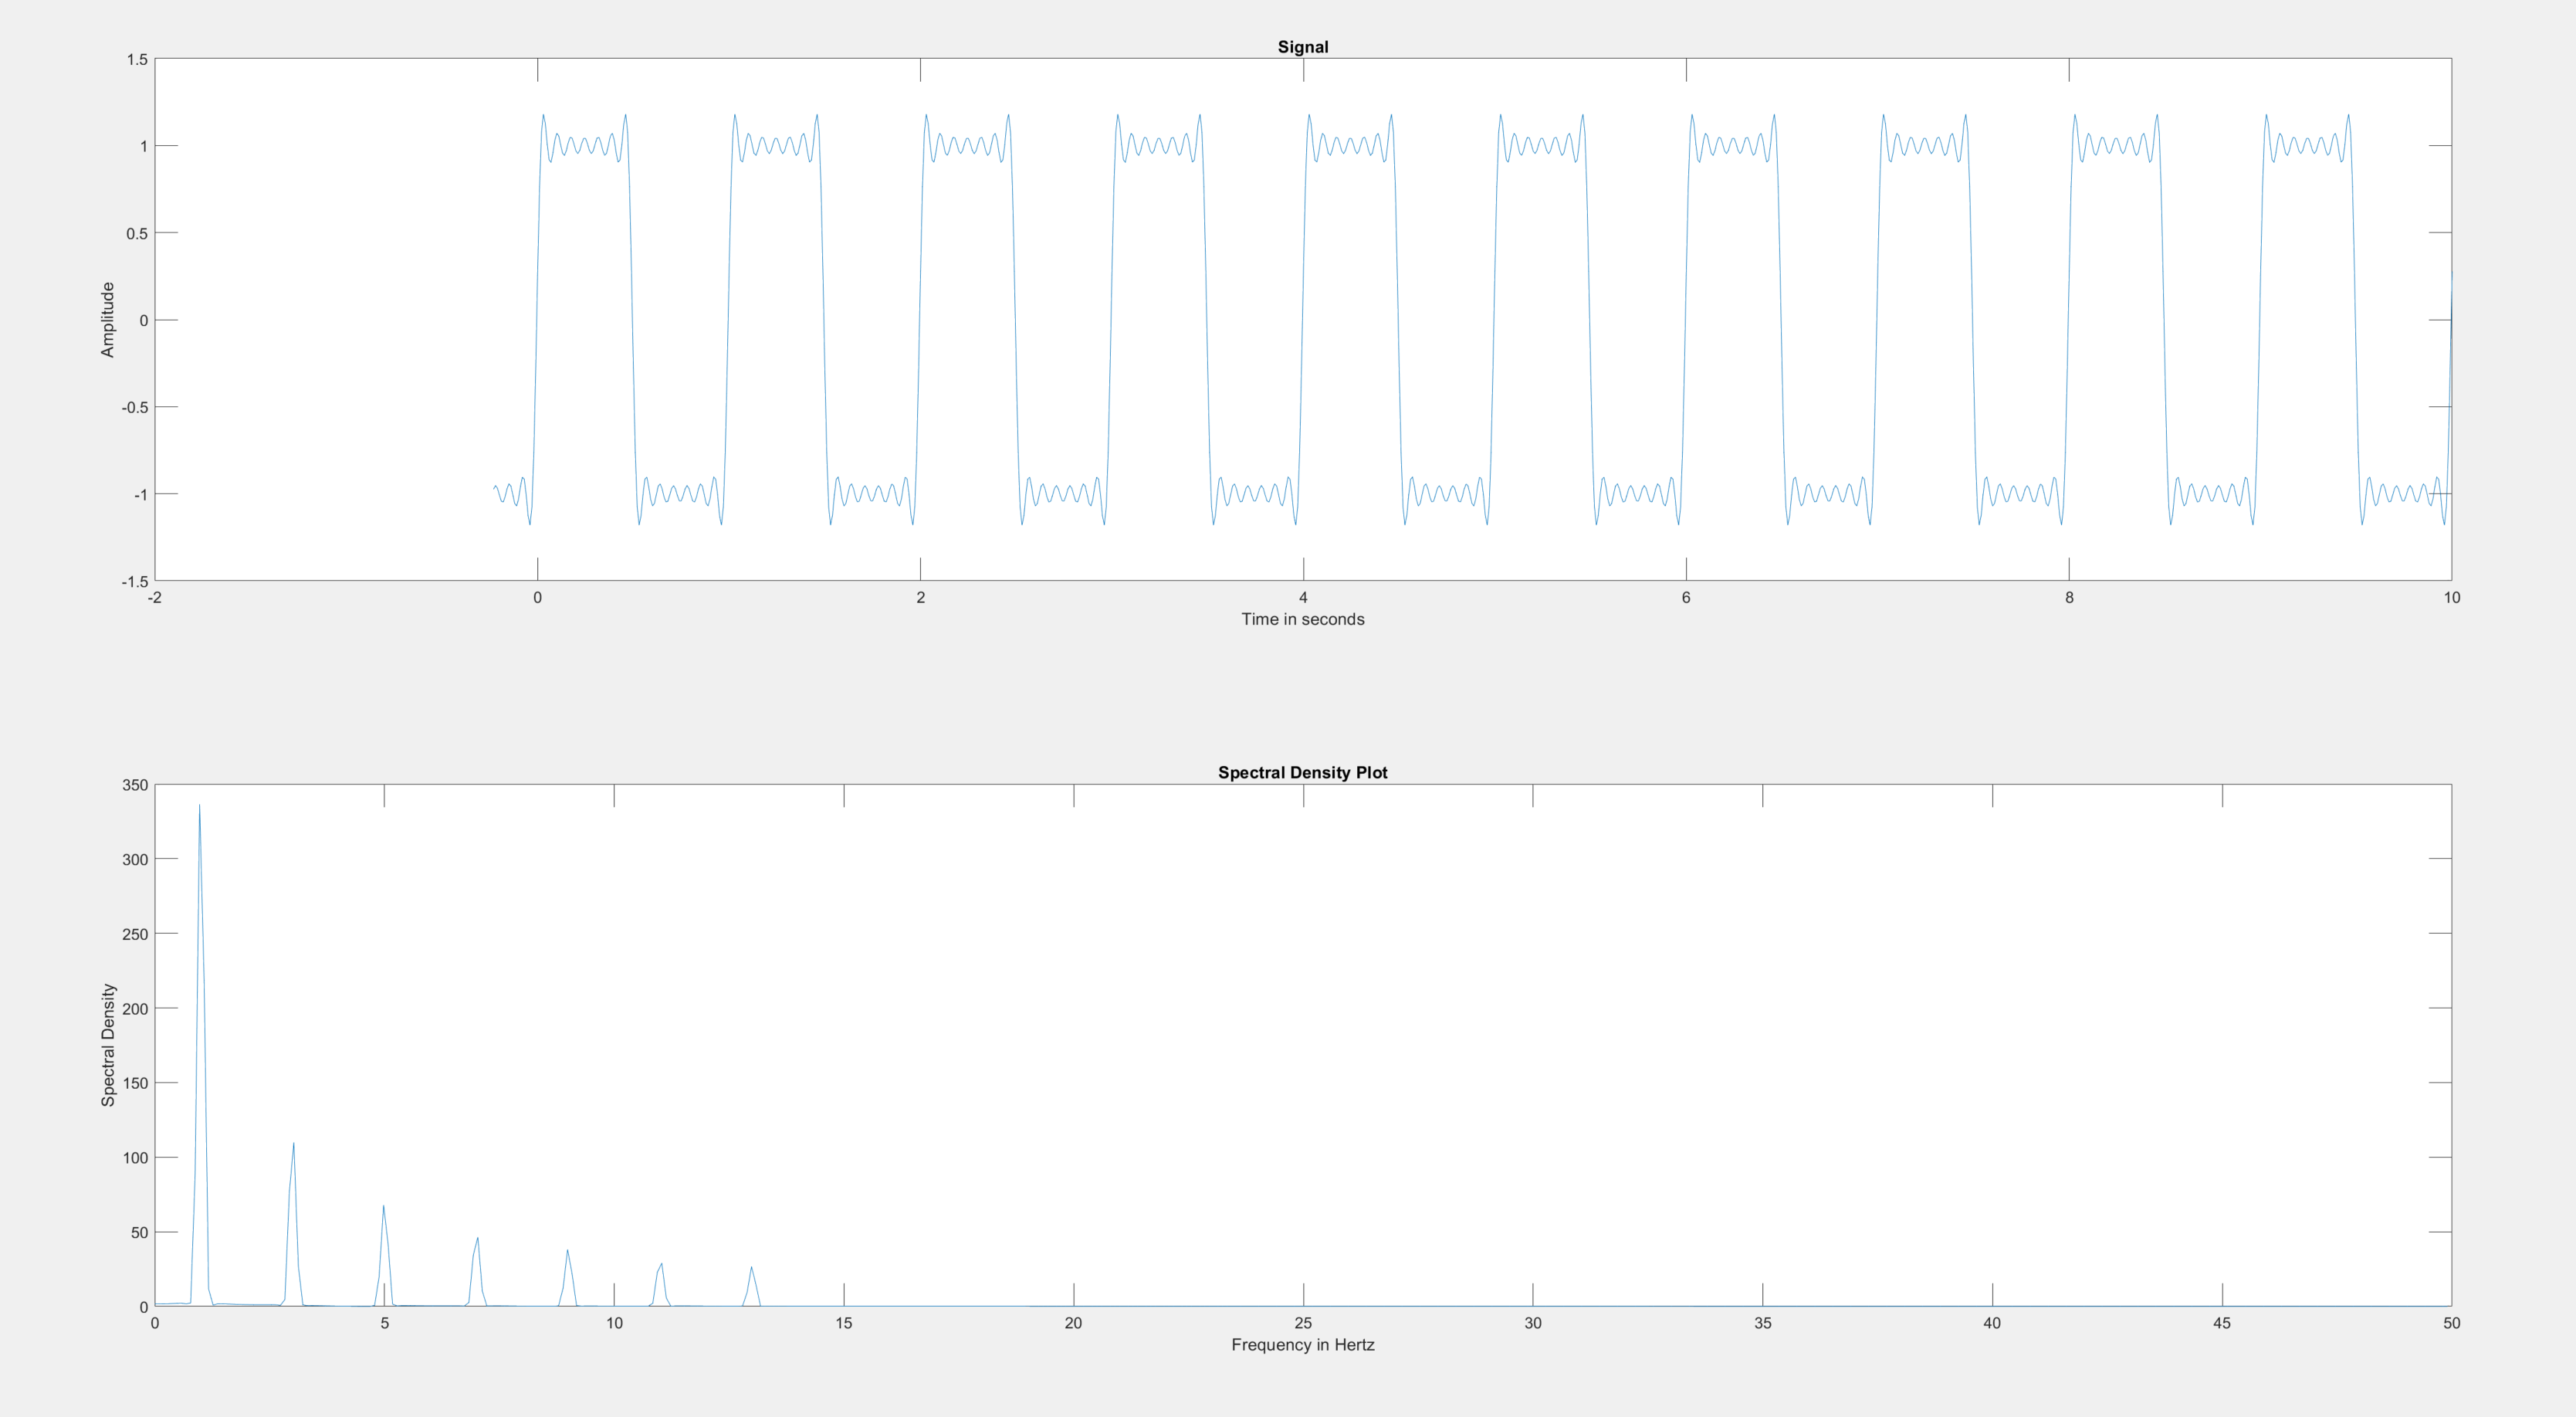

Case 2: S1

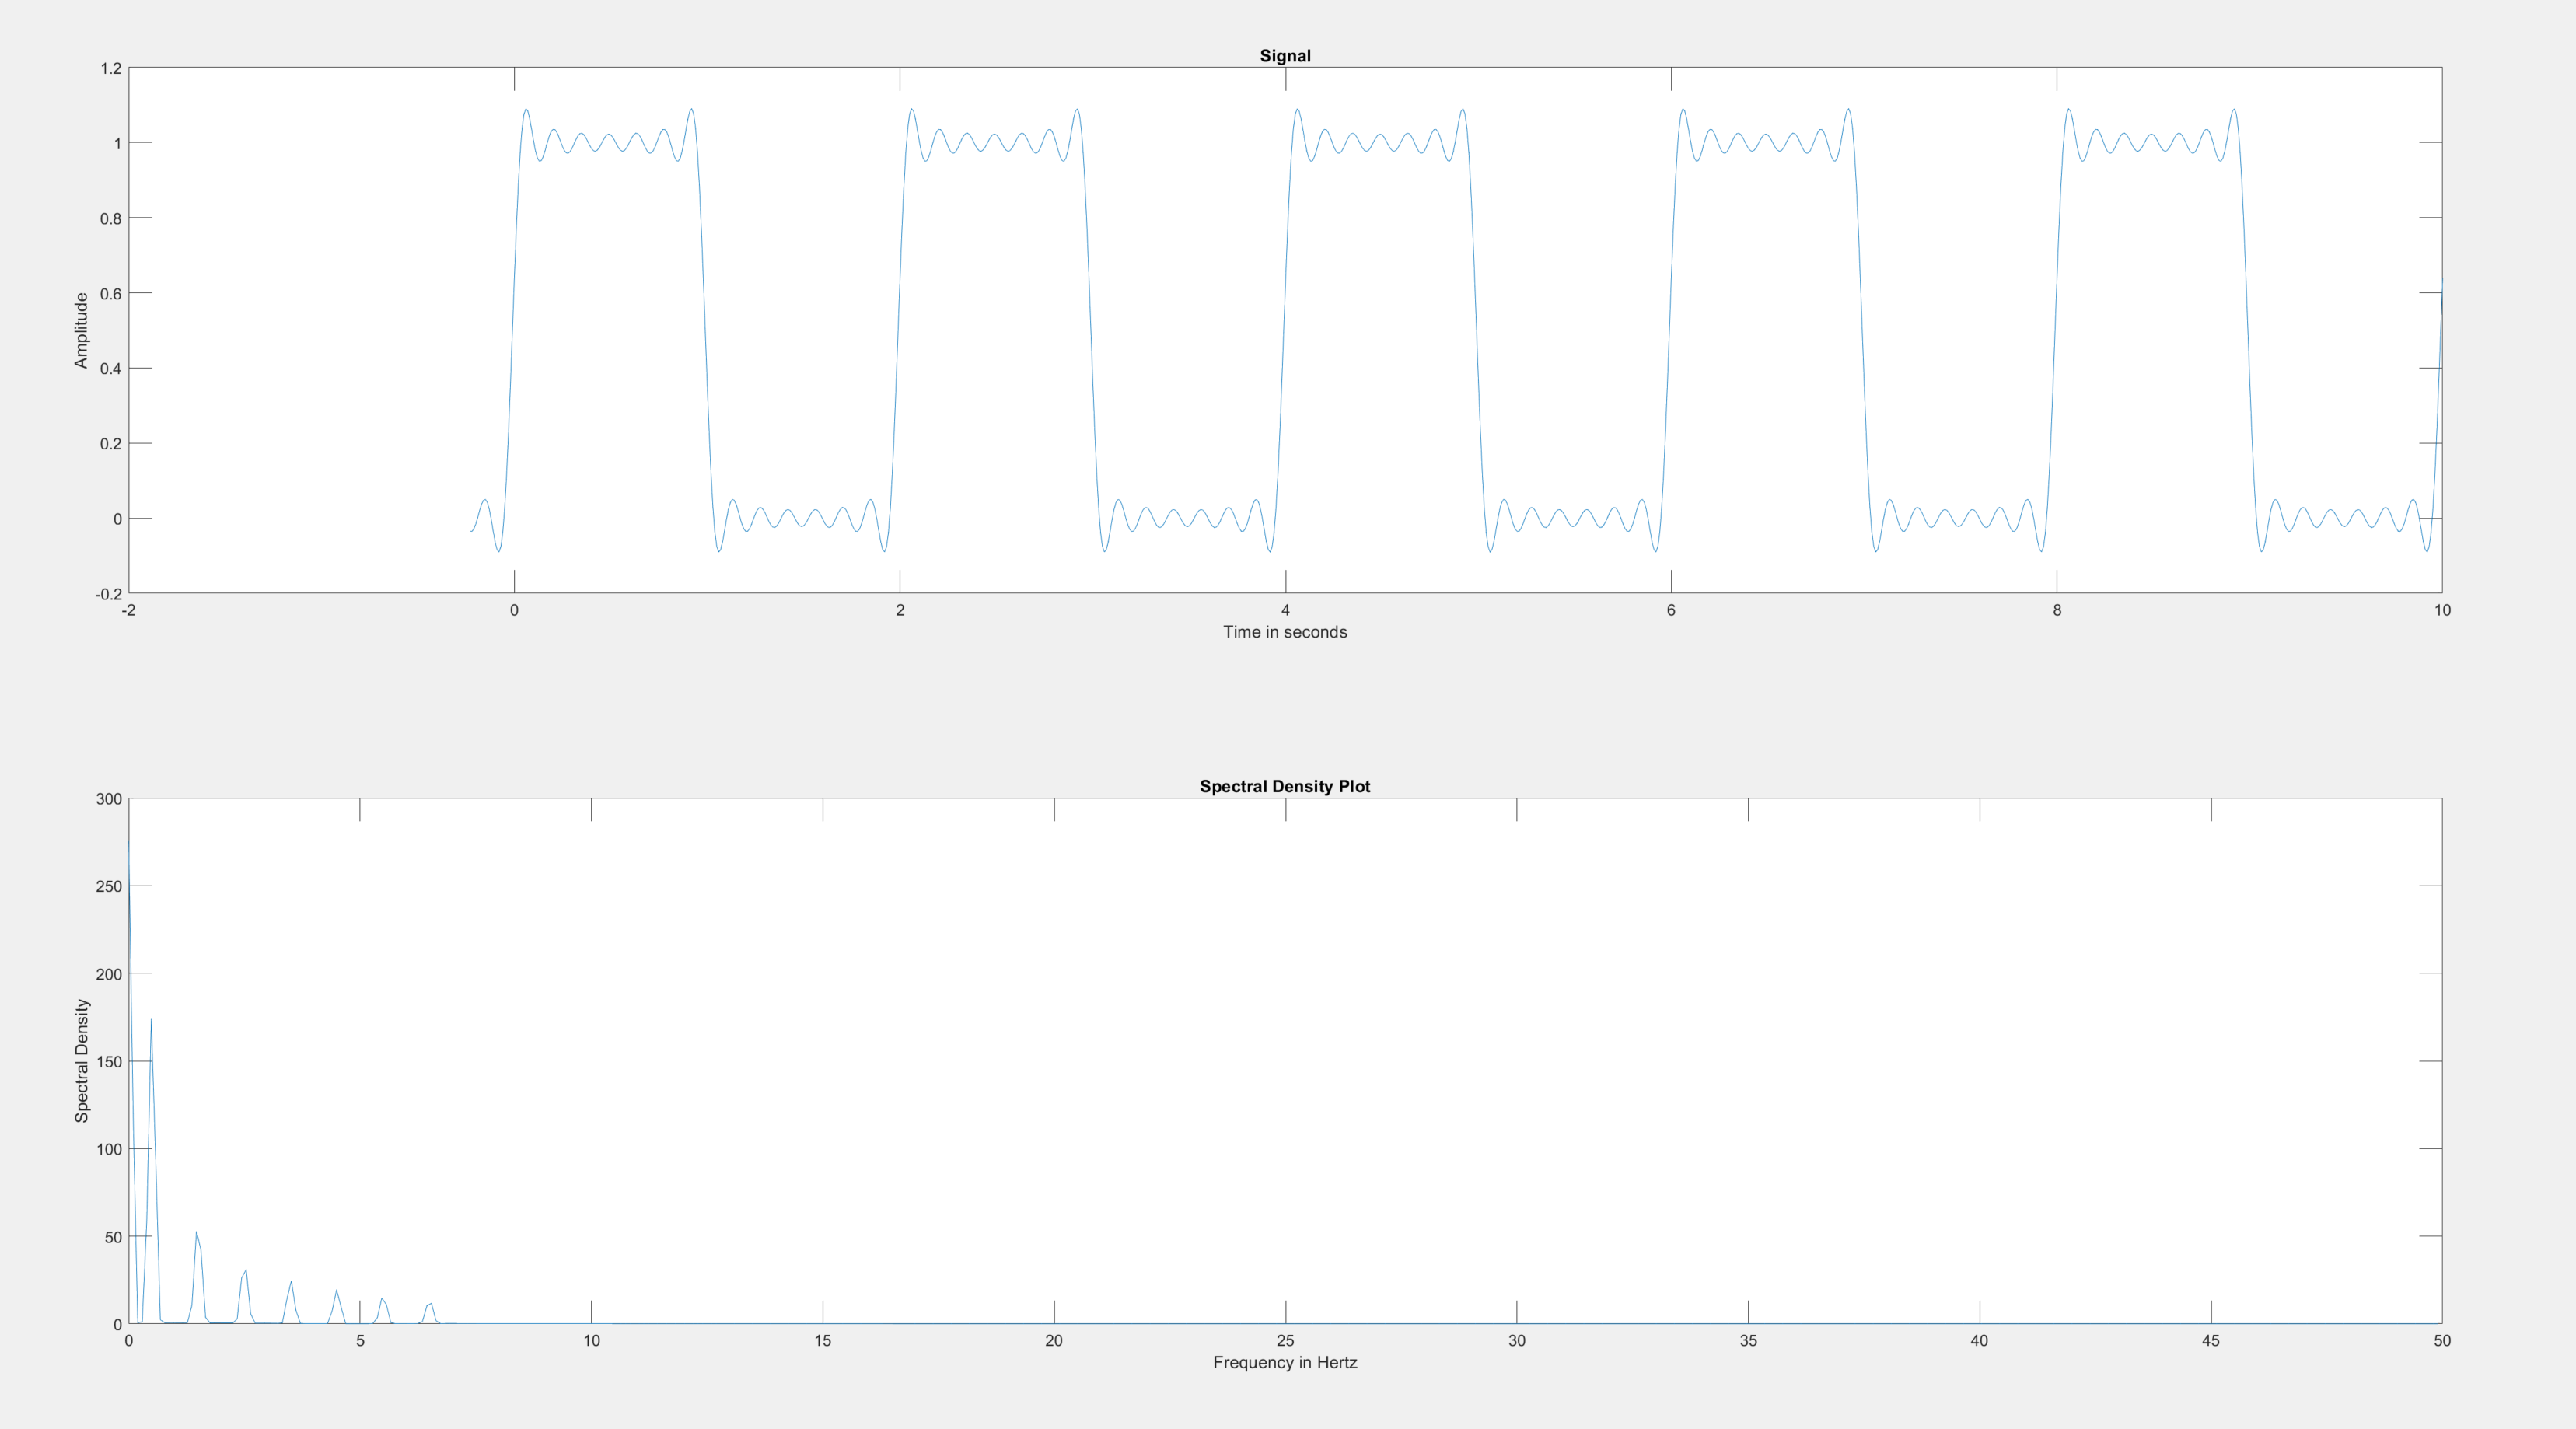

Case 3: S2

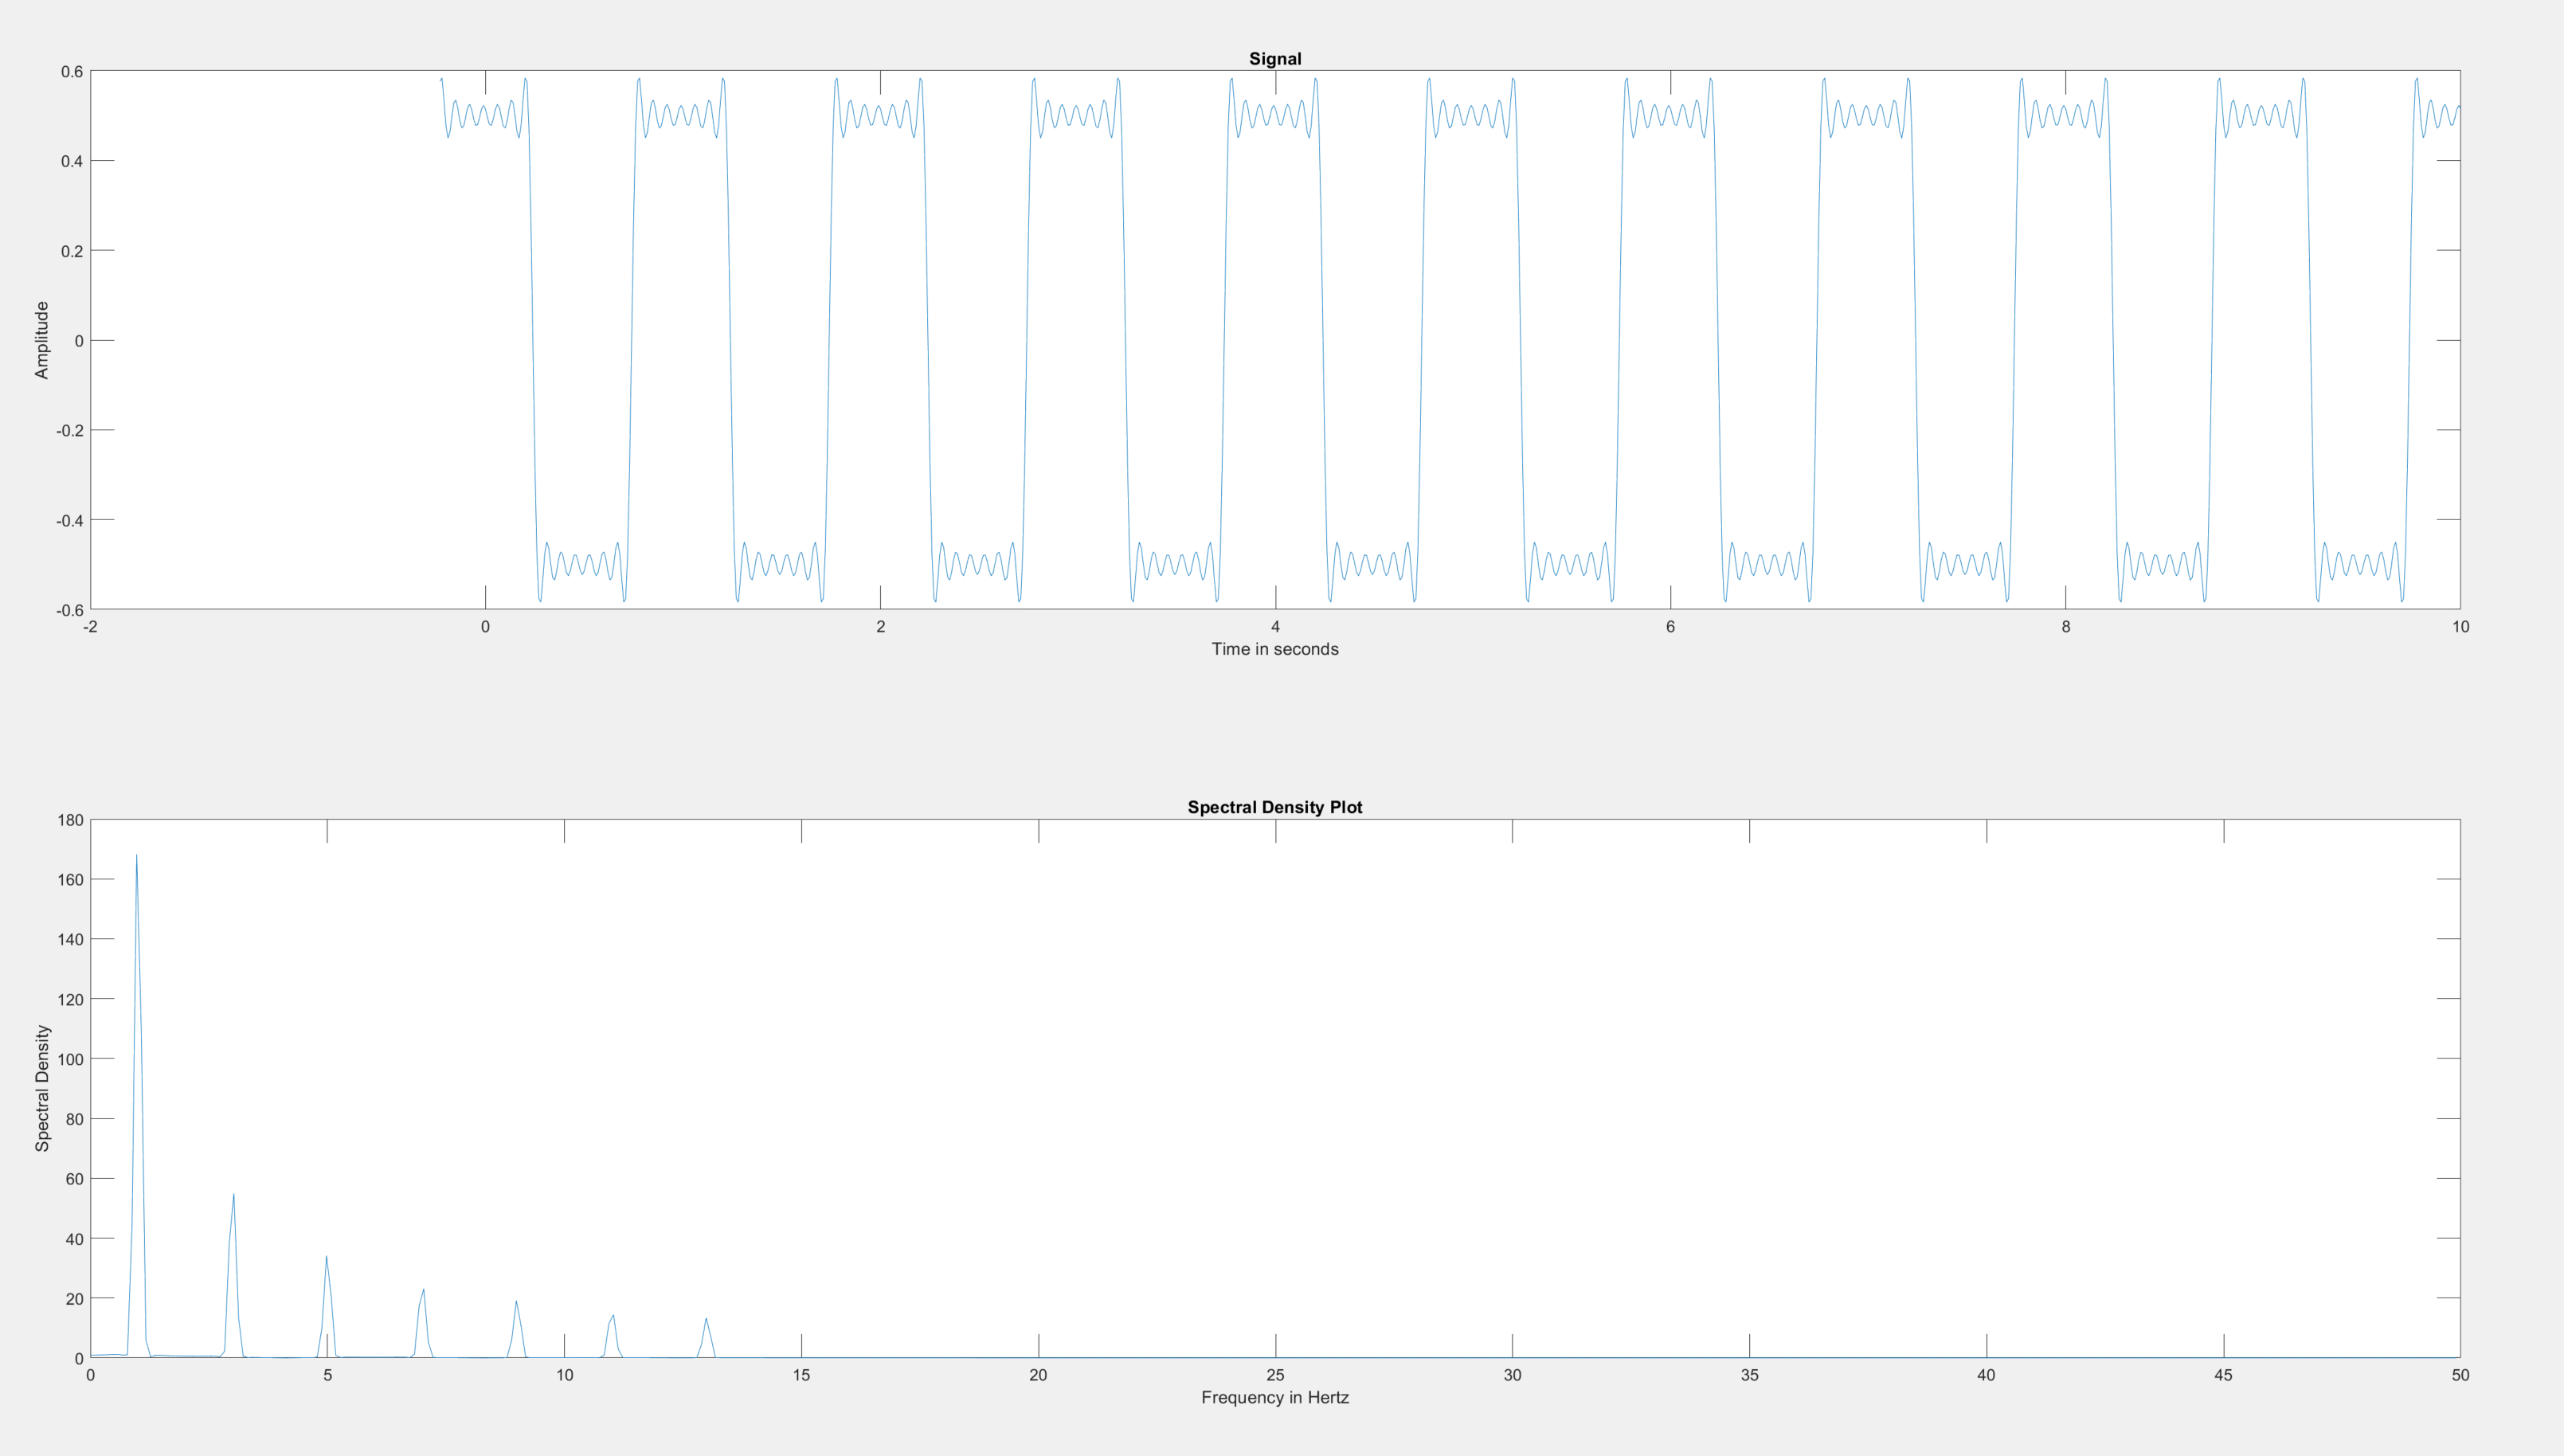

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

Case 1: The shape is close to the desired signal because you can tell its a square wave, but it does not stay flat during the peaks or valleys like the desired output. 

Case 2: Differs from the desired signal because the period is double. Besides that, the shape is close to the desired signal because you can tell its a square wave, but it does not stay flat during the peaks or valleys. 

Case 3: Differs from the desired signal because the amplitude is different (going from ~0.5 to ~-0.5 instead of ~1 to ~-1). Again, besides that, the shape is close to the desired signal because you can tell its a square wave, but it does not stay flat during the peaks or valleys. Also to be noted, the peak does not line out with zero like the desired ouput, case 1, and case 2 as it is slightly to the left of 0.

For all cases, there is a correlation with the period and structure of the spectral density. In terms of length, the bigger x-values with y-values, the shorter the period (Case 1 and Case 3) while the lower x-values with clear y-values, the longer the period (Case 2).

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

Spec. 1

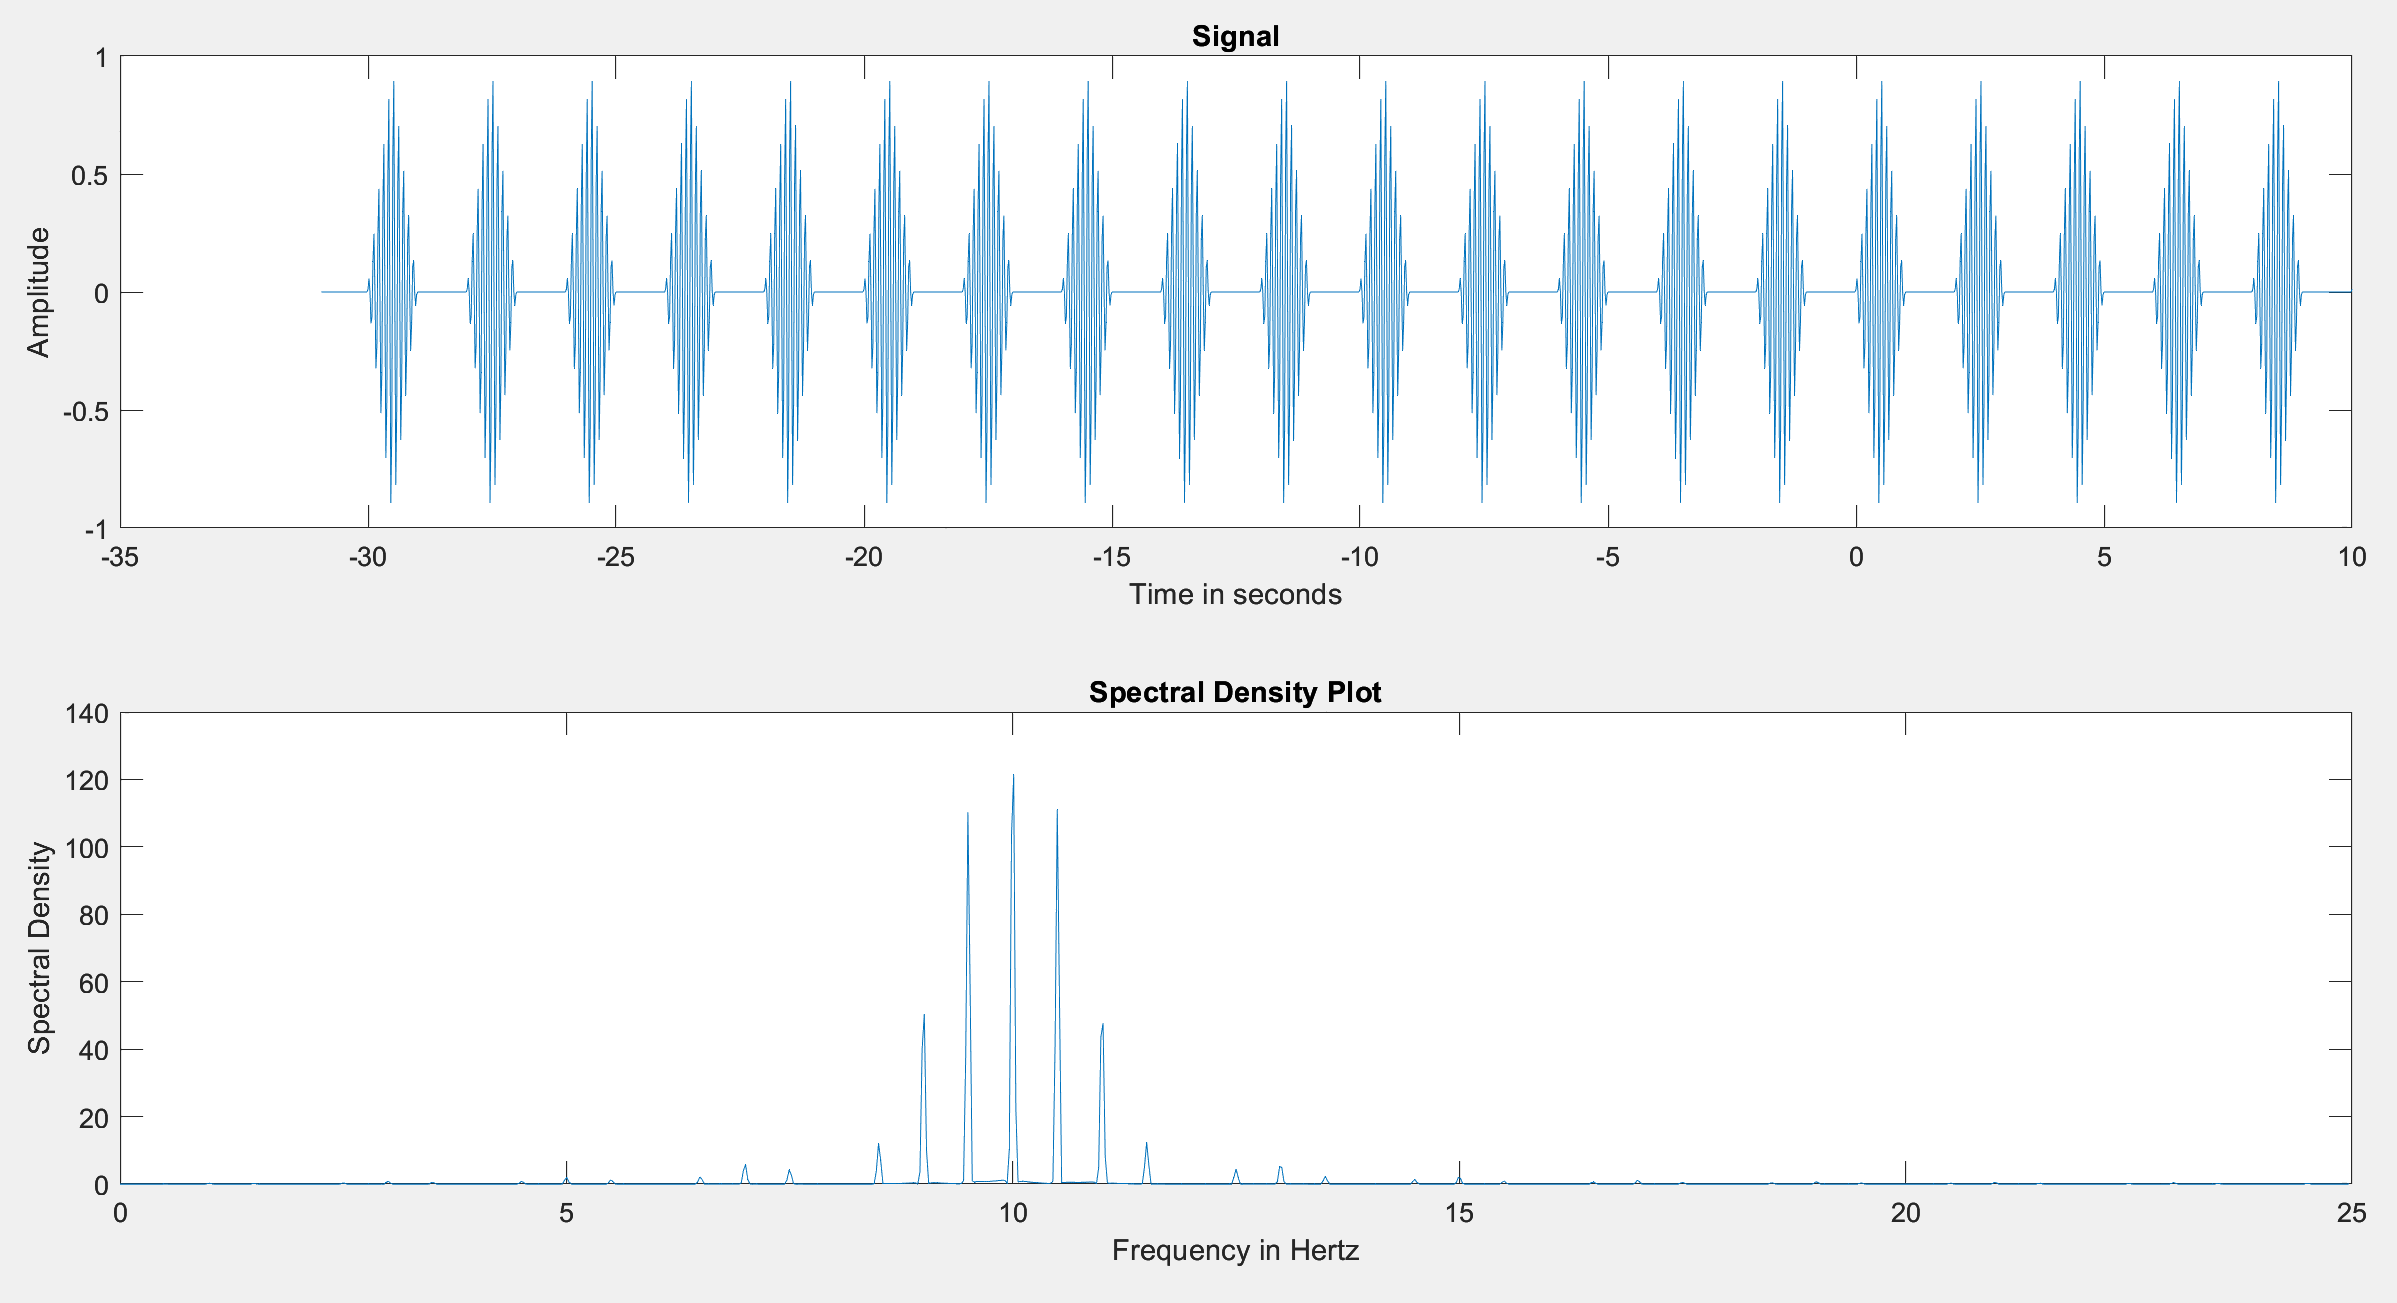

Spec. 2

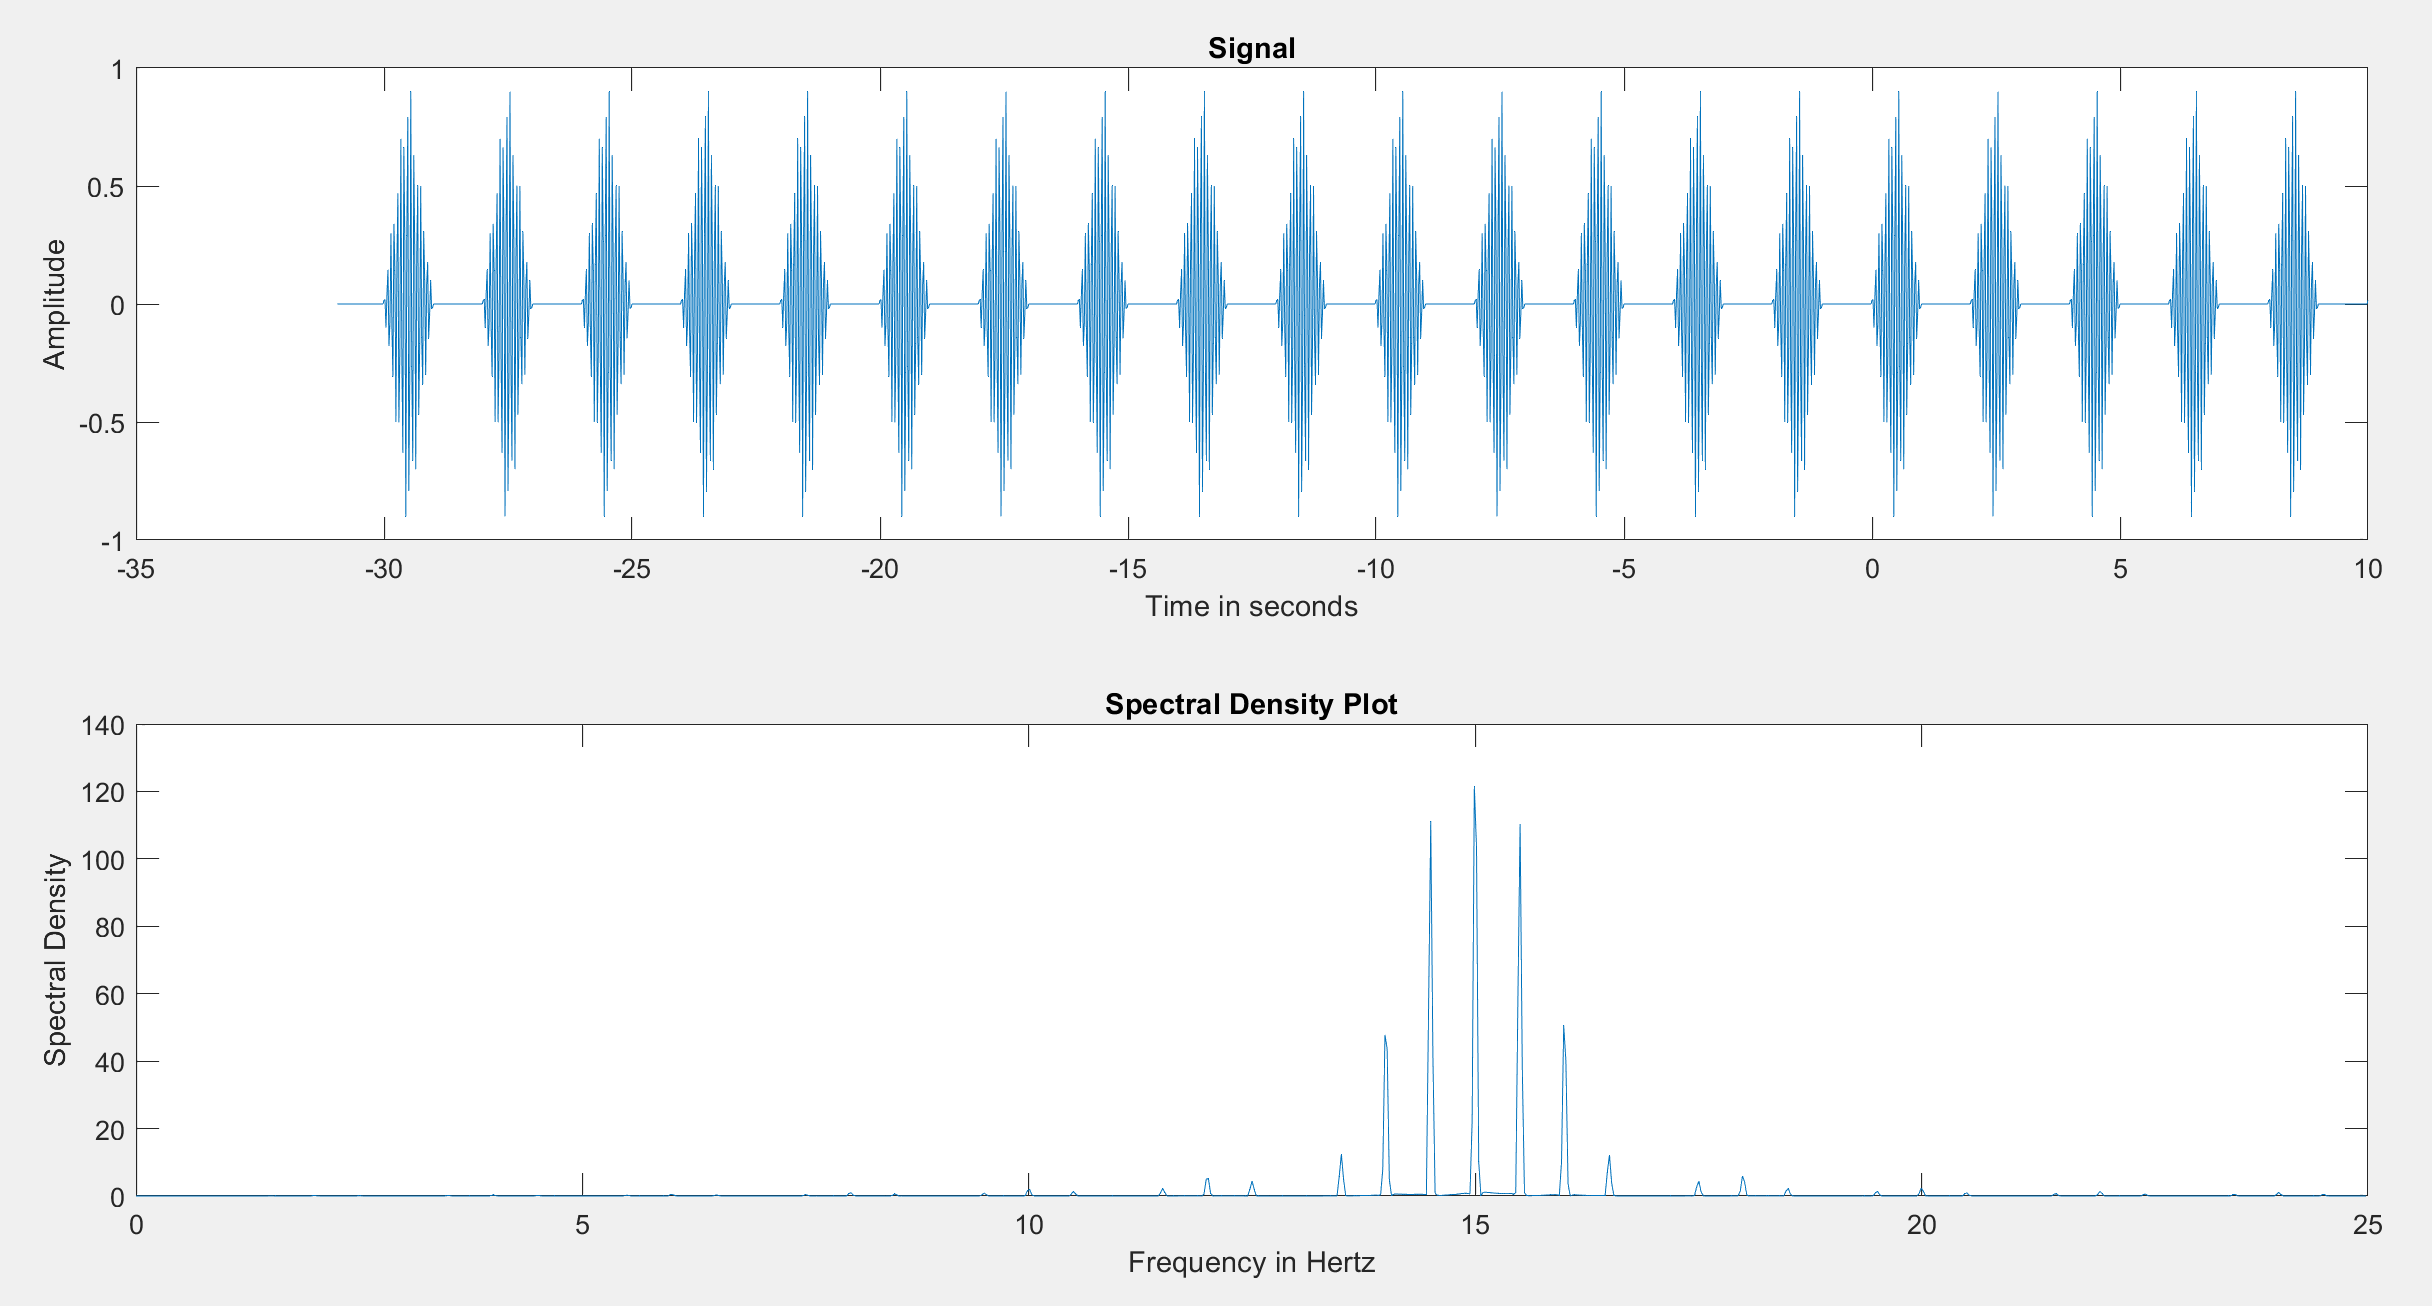

Spec. 3

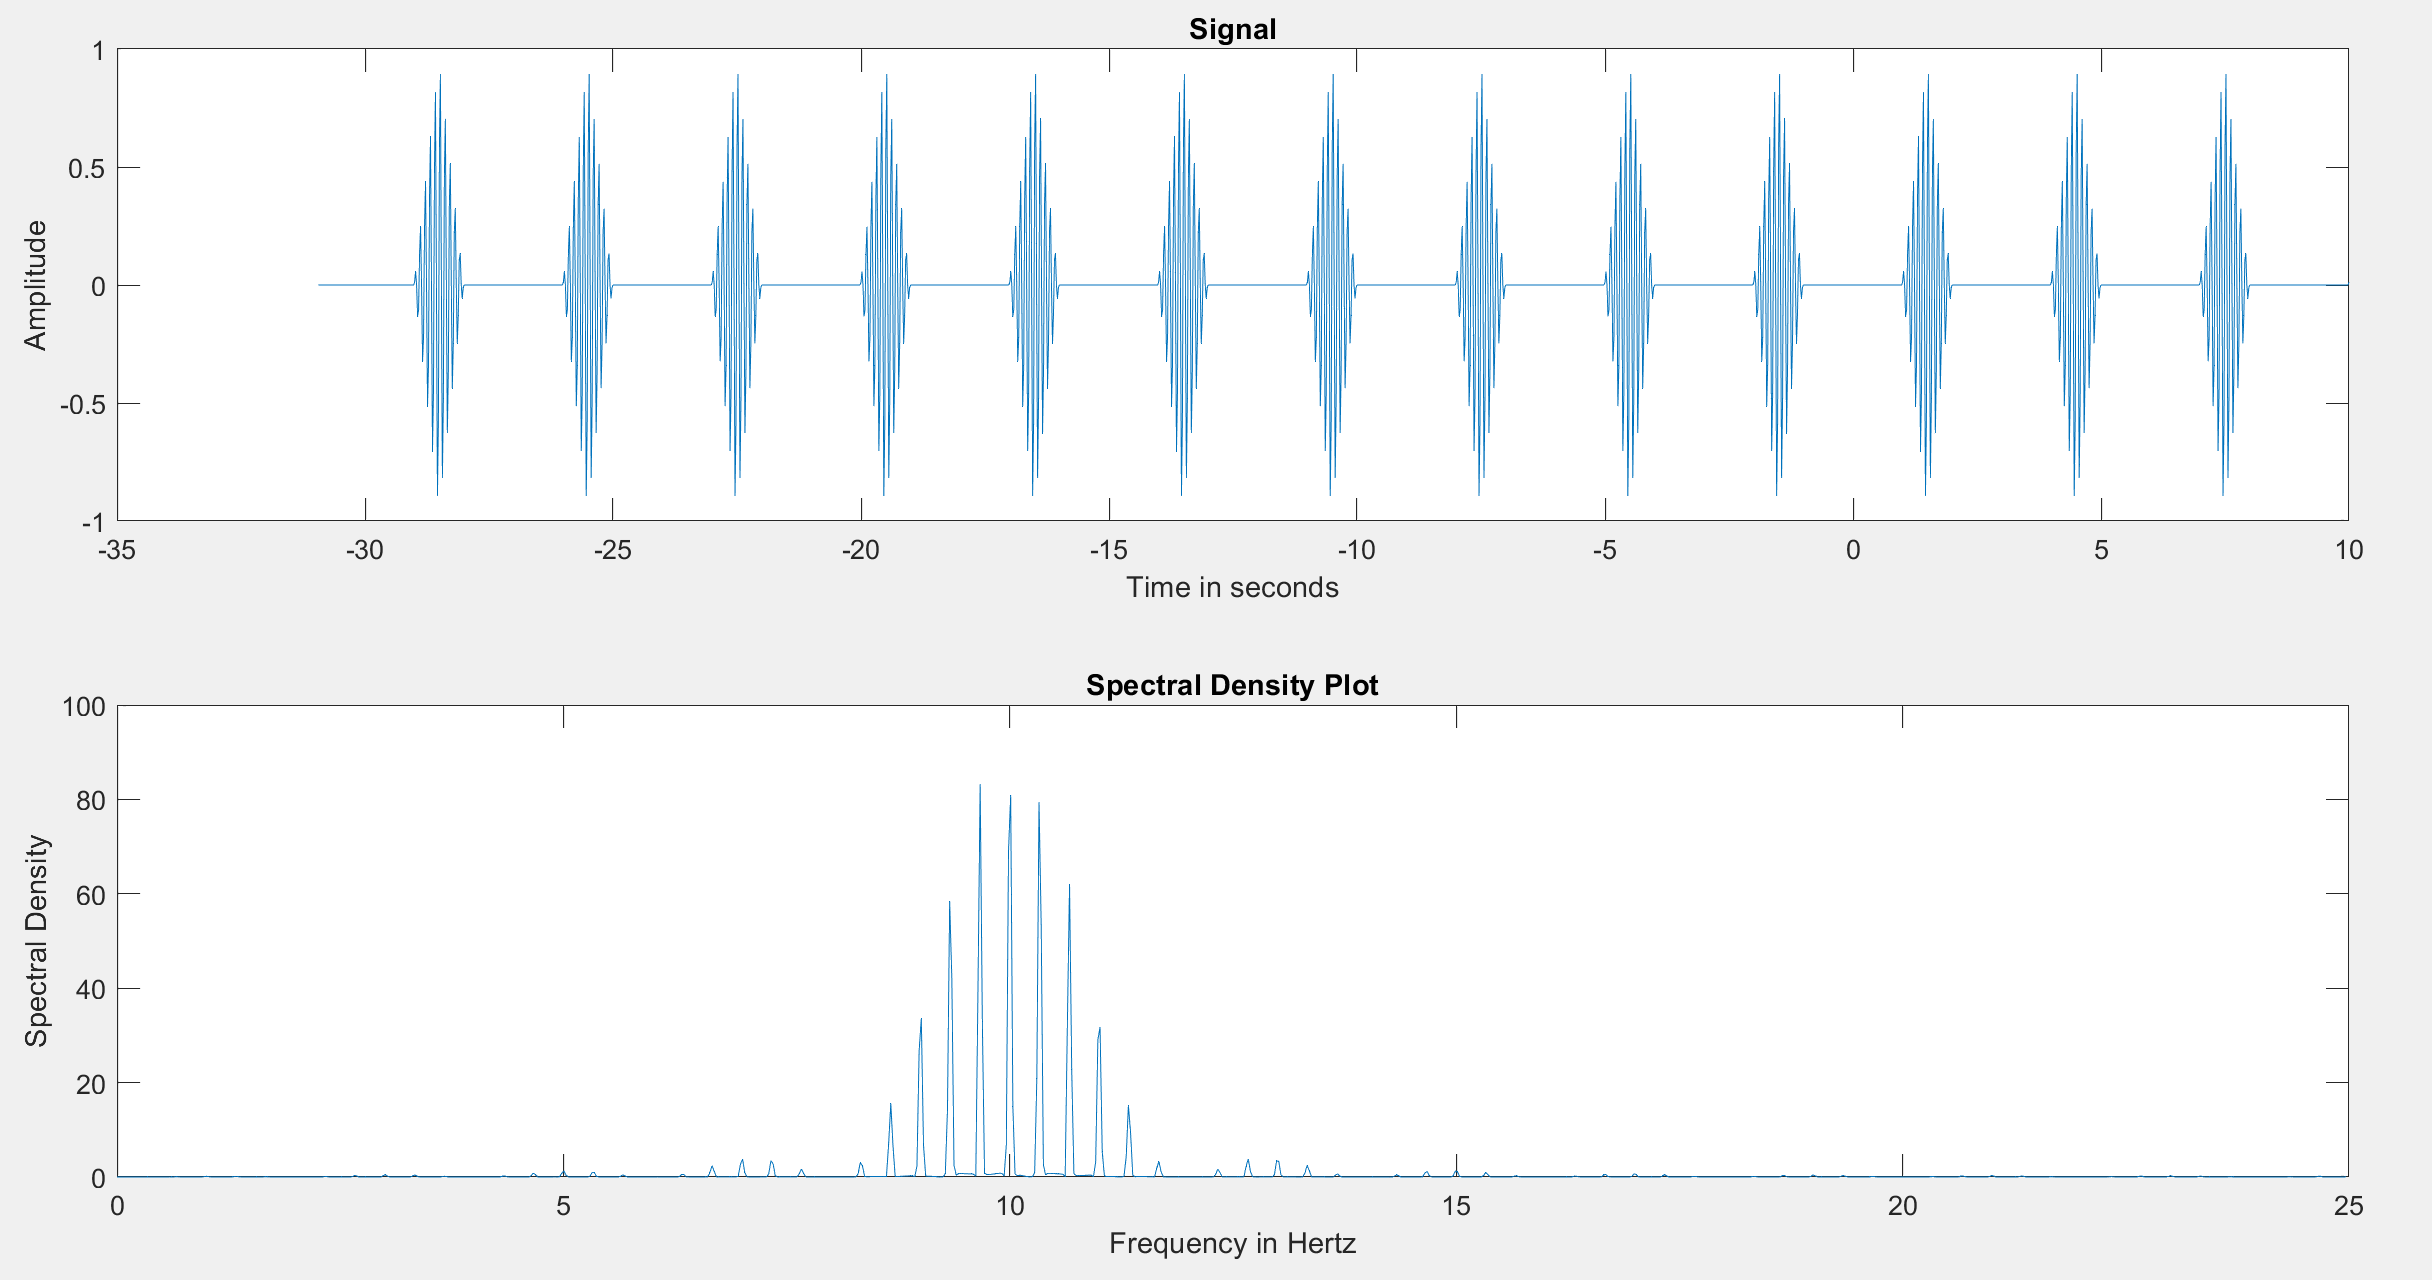

Spec. 4

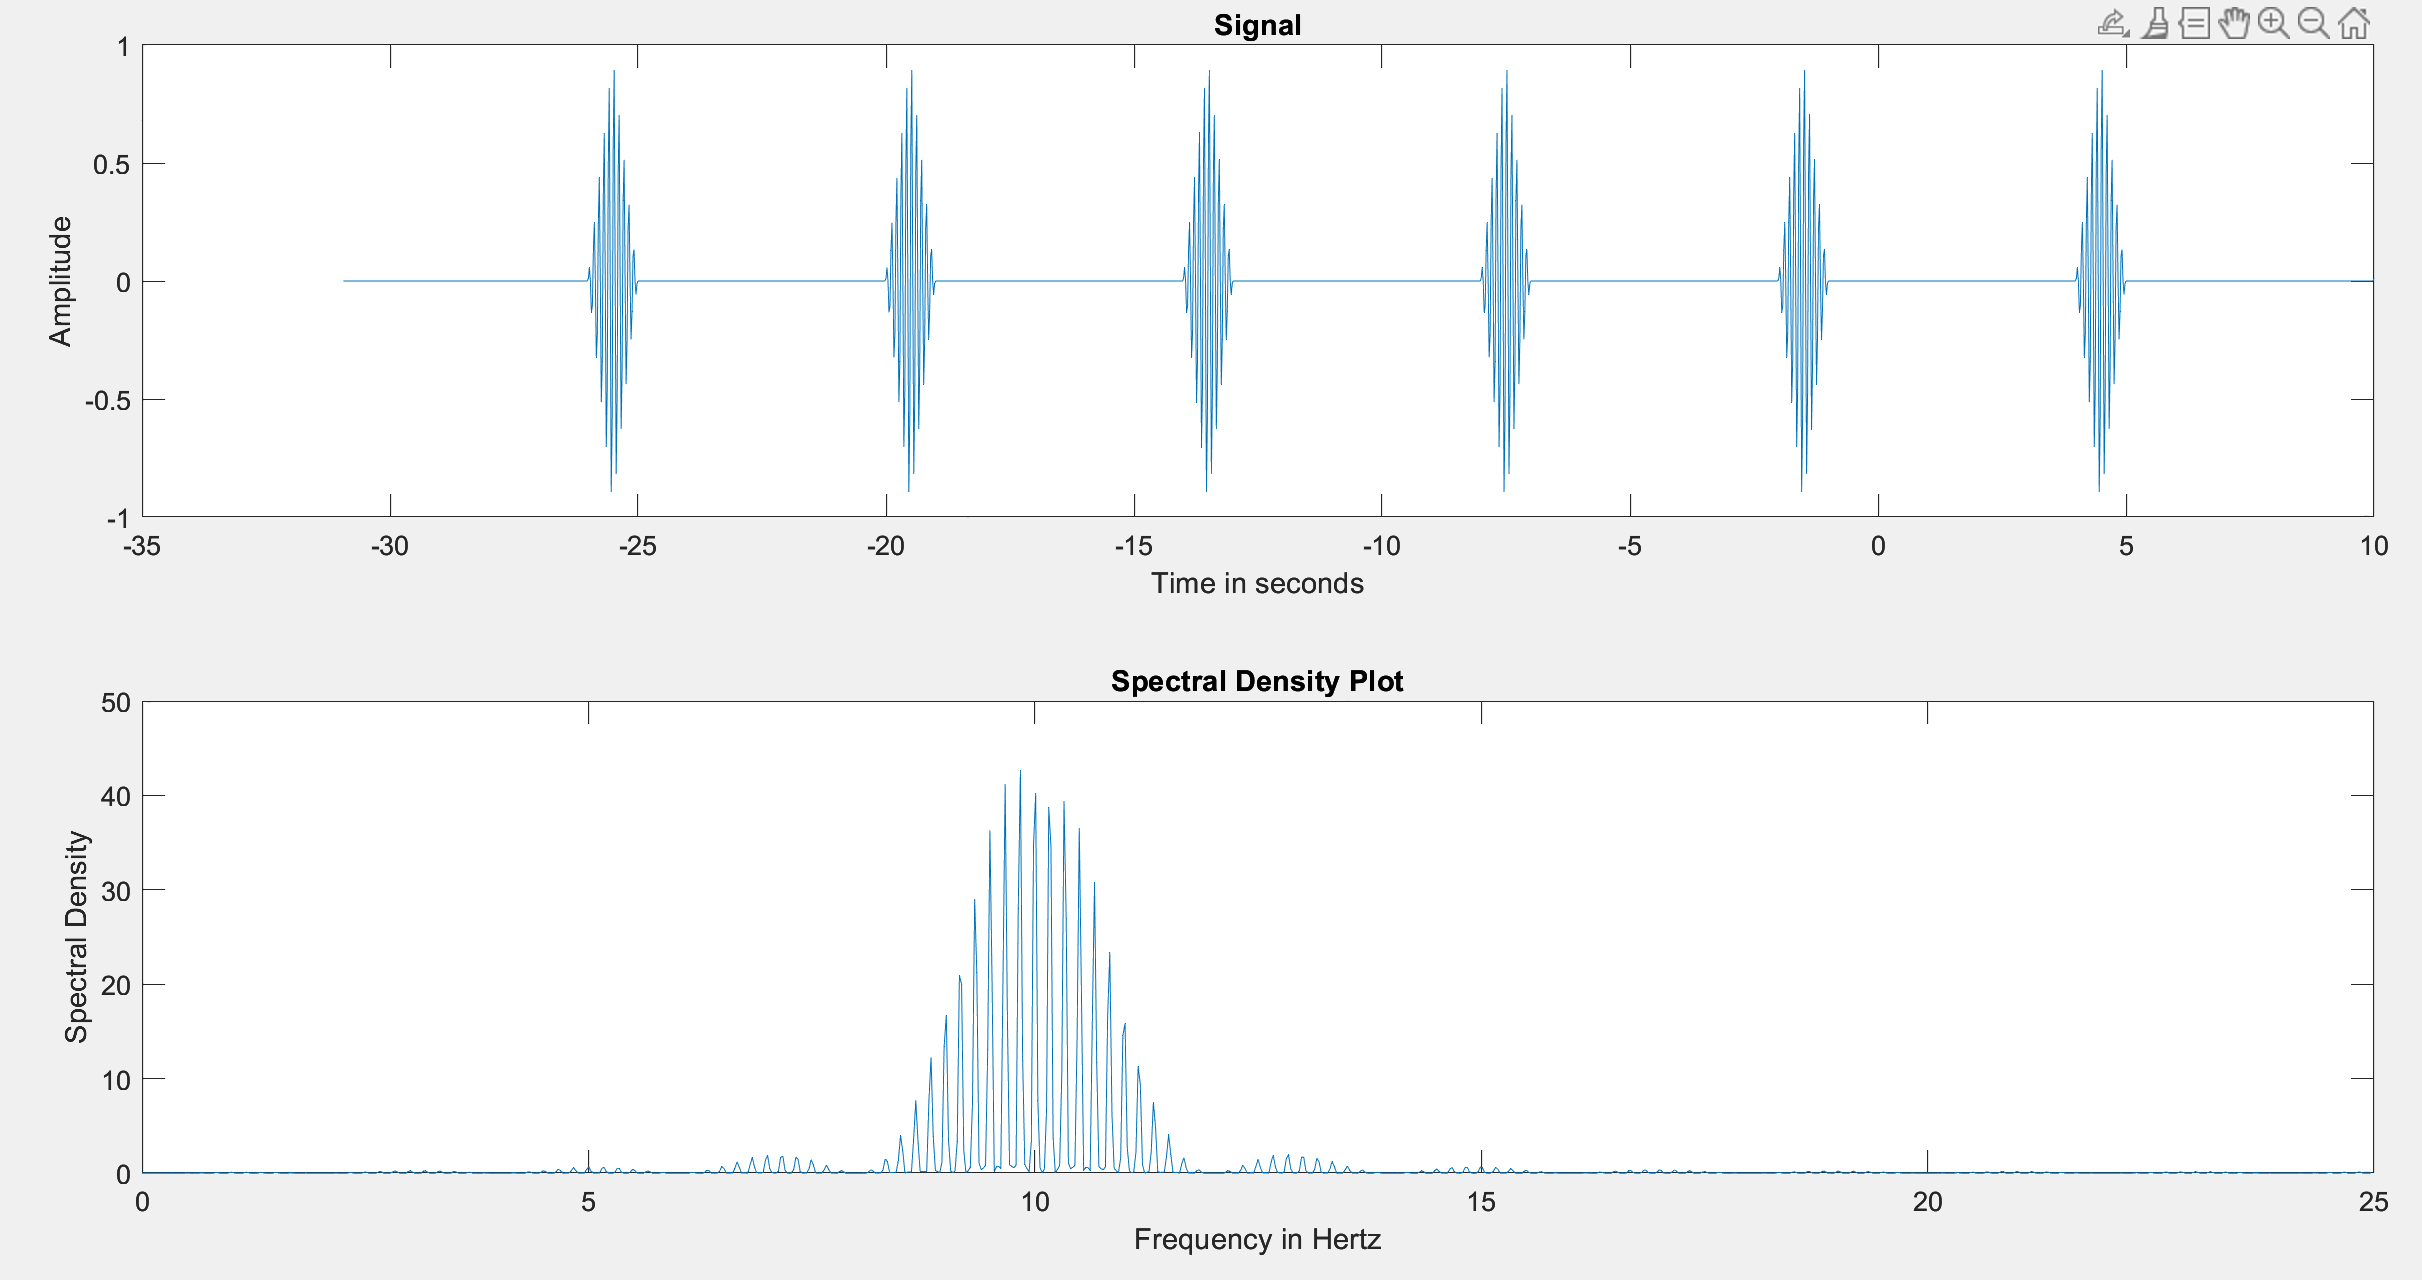

**2. What effect does changing the modulating frequency have on the spectral density?**

When comparing Spec 1 and Spec 2, the only thing that changes is the moduluating frequency. The spectral density graphs looked the same, but if you look really closer, Spec 2 graph is reflected horizontally when compared to Spec 1 graph.

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

The spectrum has a comb structure due to the product of a triangle wave and a sine wave (triangle wave acts similar to an impulse train due to the similar structure between an impulse and triangle). This leds to understanding why there spectral distance between impulses because the triangle wave is periodic with triangle waves that do not overlap. Even when the sine wave has a value, if the repeating sequence of triangle waves is 0 at that point, the product of the two waves are 0 as well.

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

If the period of the triangle pulse were to increase to infinity, we would in theory only see one triangle pulse. Thus, the sine wave would only be sampled once.

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

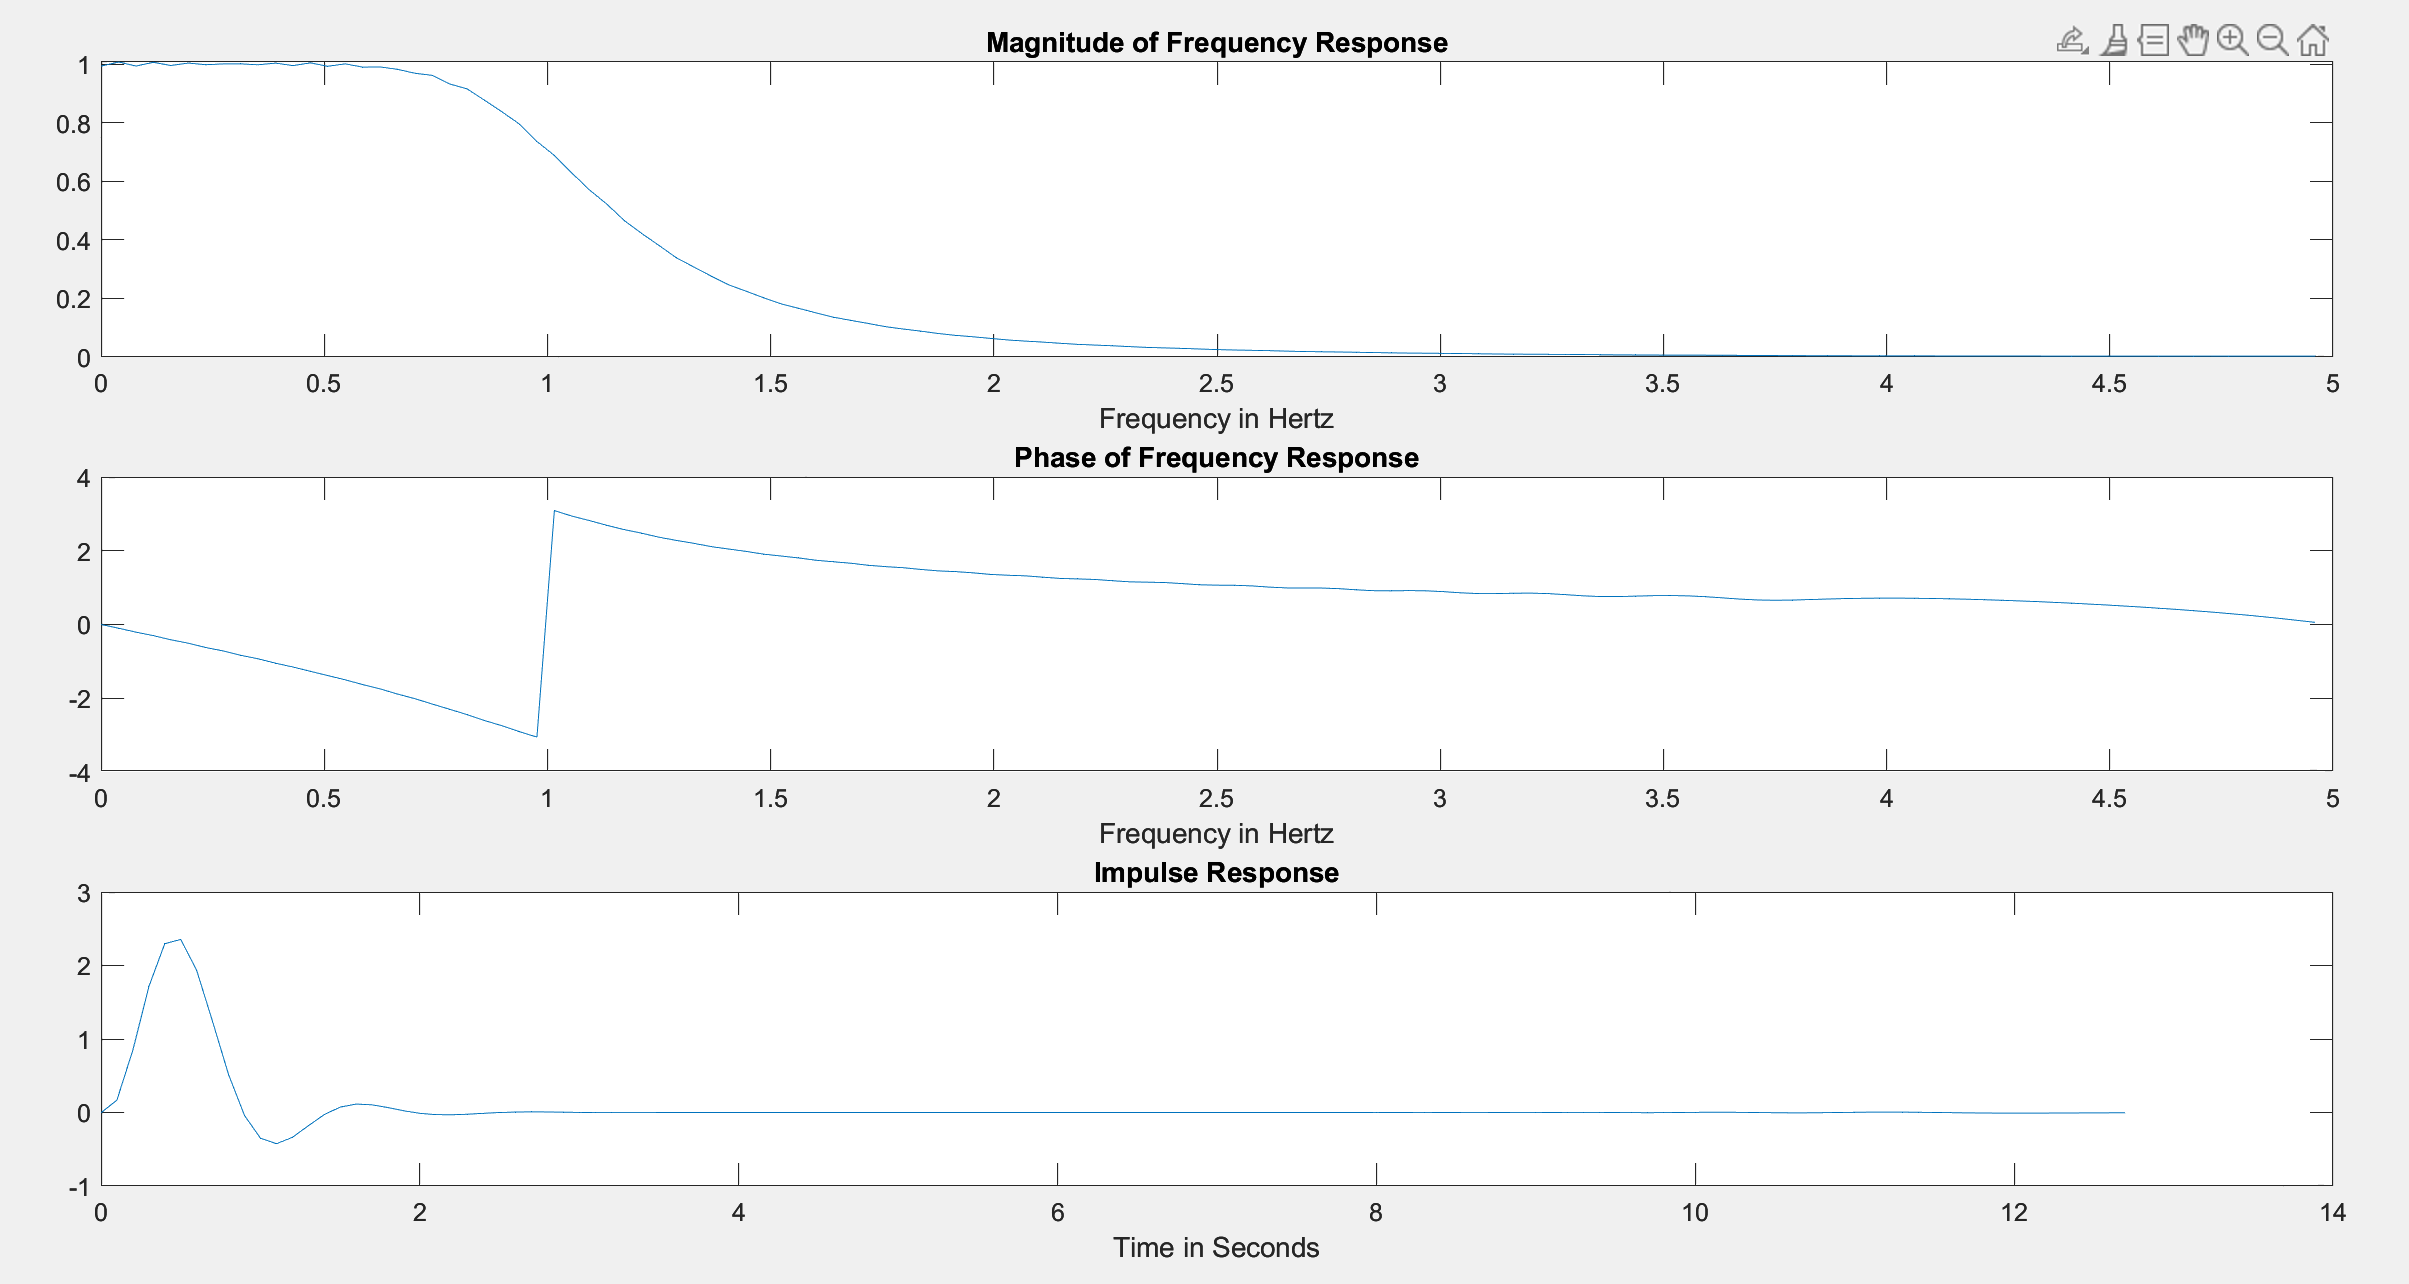insert your printout here

**2. Hand in the plot of the impulse response obtained using a unit step.**

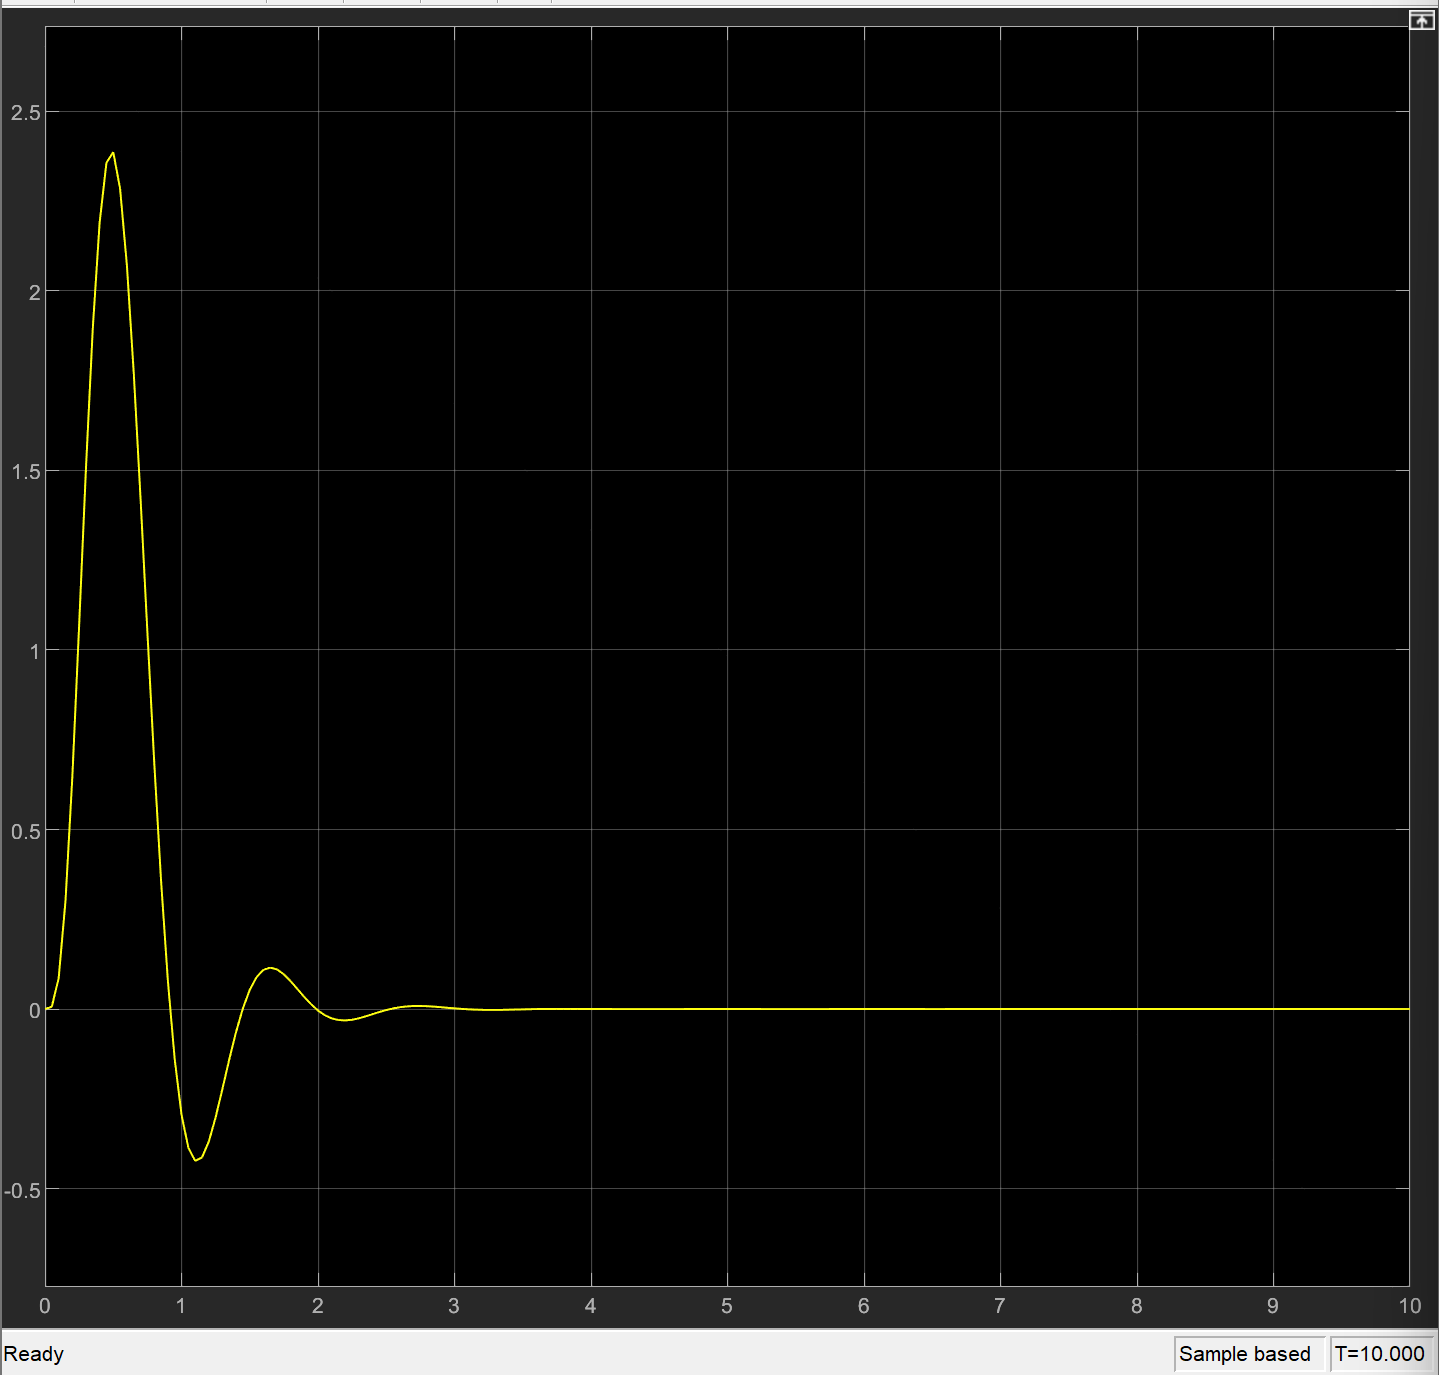

**3. What are the advantages and disadvantages of each method?**

Figure 6 method has the advantage that the block diagram is simplier and easier to visualize while the disadvantage of Figure 7 method is that the block diagram is a lot harder to visualize because there is non intuitive math involved.

Figure 7 method has the advantage that the result appears to be smoother (probably because of its disadvantage) while the Figure 6 method is not as smooth, especially at the peaks and valleys.

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [49]:
# write your code here
def DTFT(x, n0, w):
  # x is input signal
  # n0 is starting index (aka shift)
  # w frequency domain x axis 

  X = np.complex64(0)

  for n in range(len(x)):
    X += x[n] * np.exp(-1j * w * (n + n0))
  return X


**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


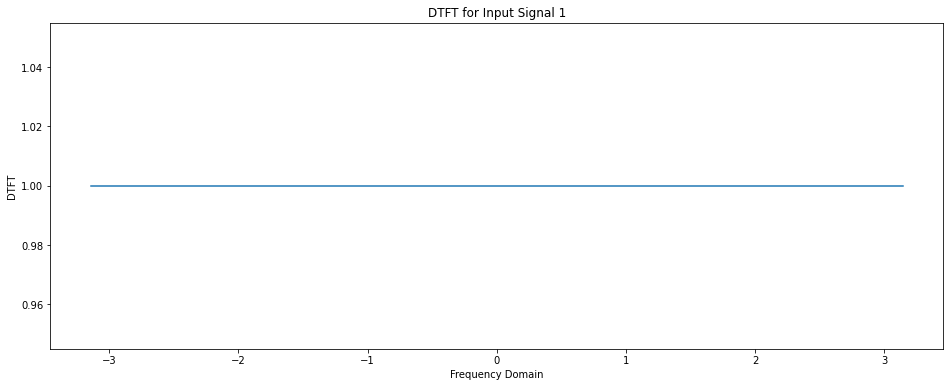

In [50]:
# write your code here
w = np.linspace(-np.pi, np.pi, 101) # freq domain x axis
n = np.linspace(-50, 50, 101) # time domain x axis
n0 = n[0] # n0 aka shift of n 

x1 = (n == 0).astype(float) 
X1 = DTFT(x1, n0, w)
plt.title("DTFT for Input Signal 1")
plt.xlabel("Frequency Domain")
plt.ylabel("DTFT")
plt.plot(w, X1)
plt.show()


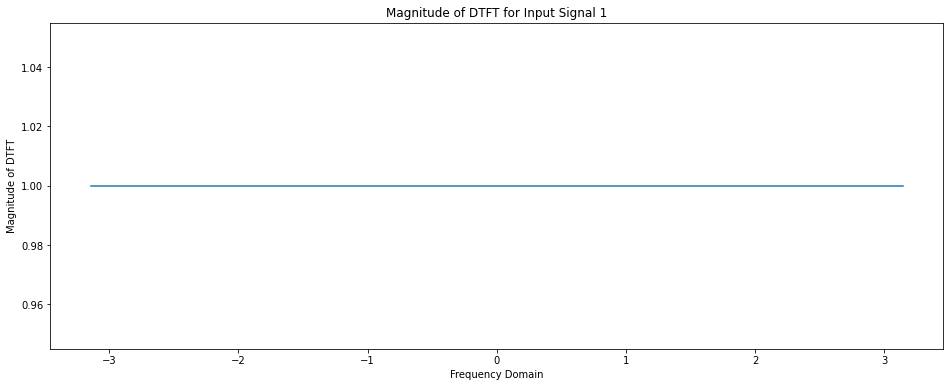

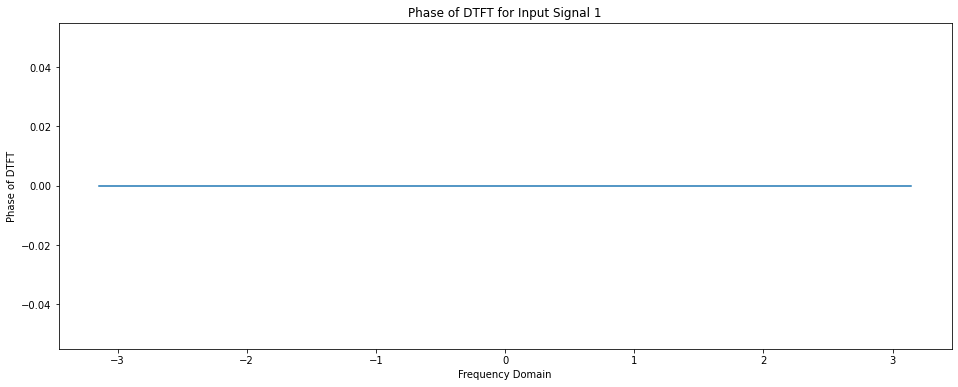

In [51]:
plt.title("Magnitude of DTFT for Input Signal 1")
plt.xlabel("Frequency Domain")
plt.ylabel("Magnitude of DTFT")
plt.plot(w, np.abs(X1))
plt.show()

plt.title("Phase of DTFT for Input Signal 1")
plt.xlabel("Frequency Domain")
plt.ylabel("Phase of DTFT")
plt.plot(w, np.angle(X1))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


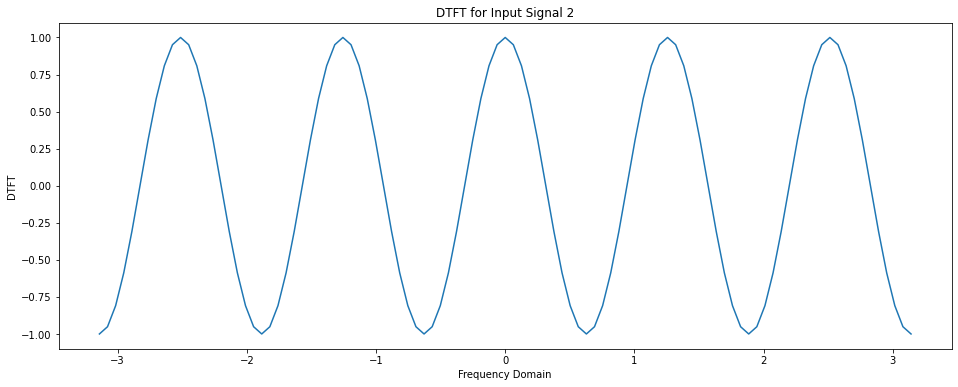

In [52]:
x2 = (n == 5).astype(float) 
X2 = DTFT(x2, n0, w)
plt.title("DTFT for Input Signal 2")
plt.xlabel("Frequency Domain")
plt.ylabel("DTFT")
plt.plot(w, X2)
plt.show()

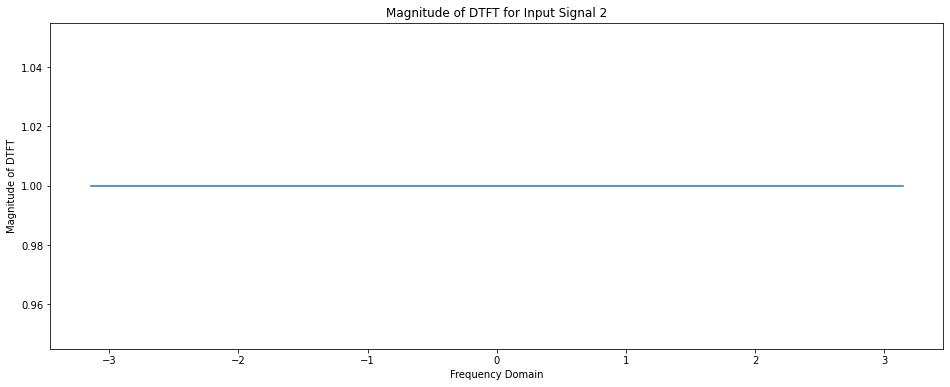

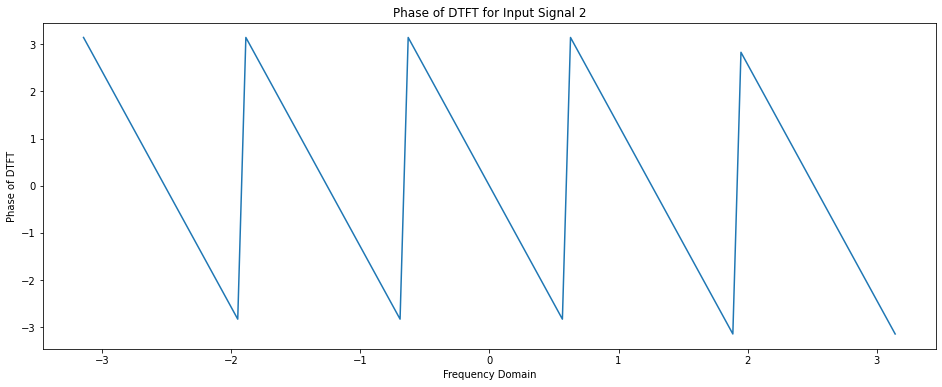

In [53]:
plt.title("Magnitude of DTFT for Input Signal 2")
plt.xlabel("Frequency Domain")
plt.ylabel("Magnitude of DTFT")
plt.plot(w, np.abs(X2))
plt.show()

plt.title("Phase of DTFT for Input Signal 2")
plt.xlabel("Frequency Domain")
plt.ylabel("Phase of DTFT")
plt.plot(w, np.angle(X2))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


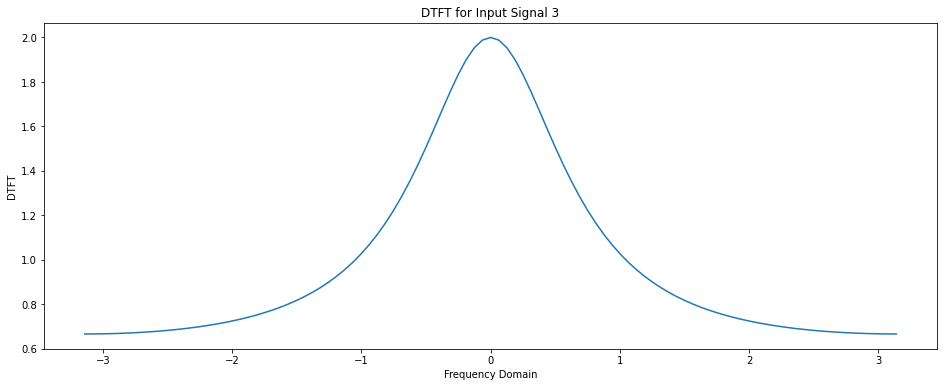

In [54]:
x3 = np.power(.5, n) * (n >= 0).astype(float)
X3 = DTFT(x3, n0, w)
plt.title("DTFT for Input Signal 3")
plt.xlabel("Frequency Domain")
plt.ylabel("DTFT")
plt.plot(w, X3)
plt.show()

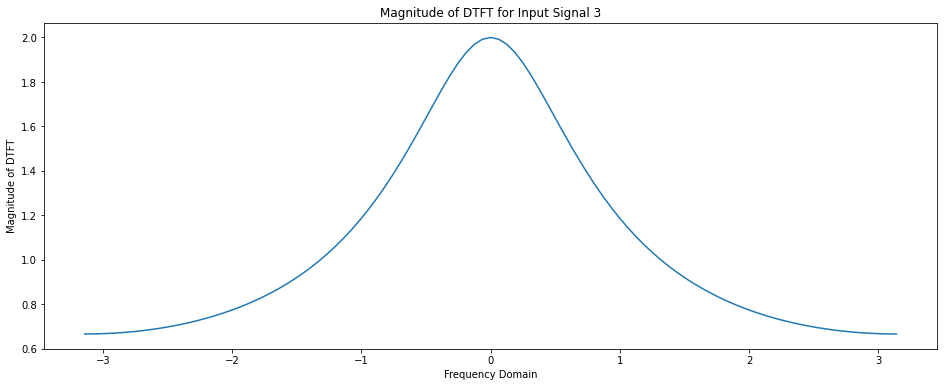

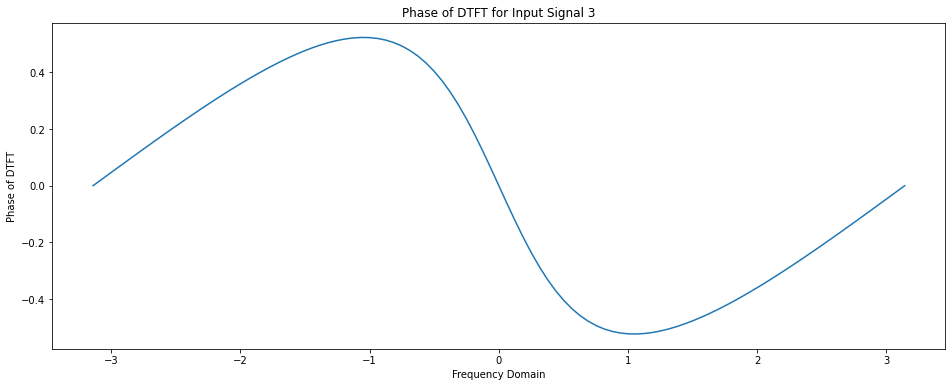

In [55]:
plt.title("Magnitude of DTFT for Input Signal 3")
plt.xlabel("Frequency Domain")
plt.ylabel("Magnitude of DTFT")
plt.plot(w, np.abs(X3))
plt.show()

plt.title("Phase of DTFT for Input Signal 3")
plt.xlabel("Frequency Domain")
plt.ylabel("Phase of DTFT")
plt.plot(w, np.angle(X3))
plt.show()

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

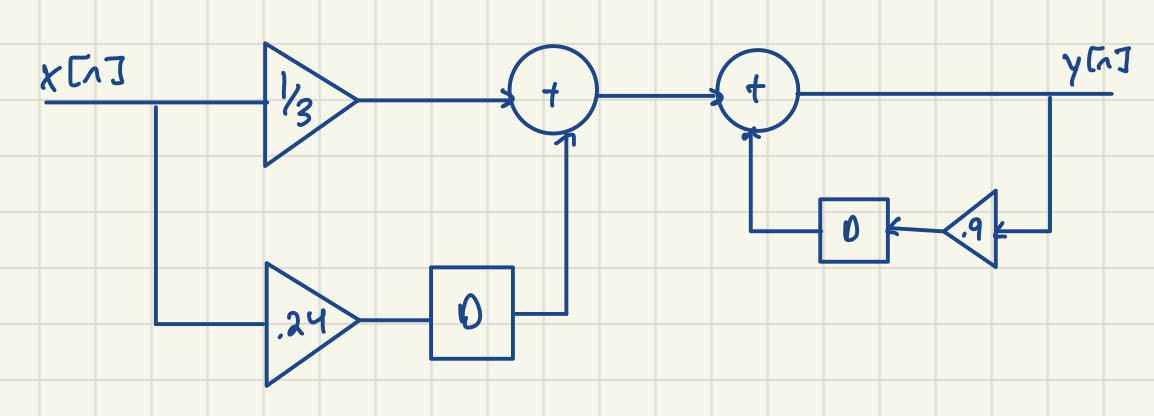

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

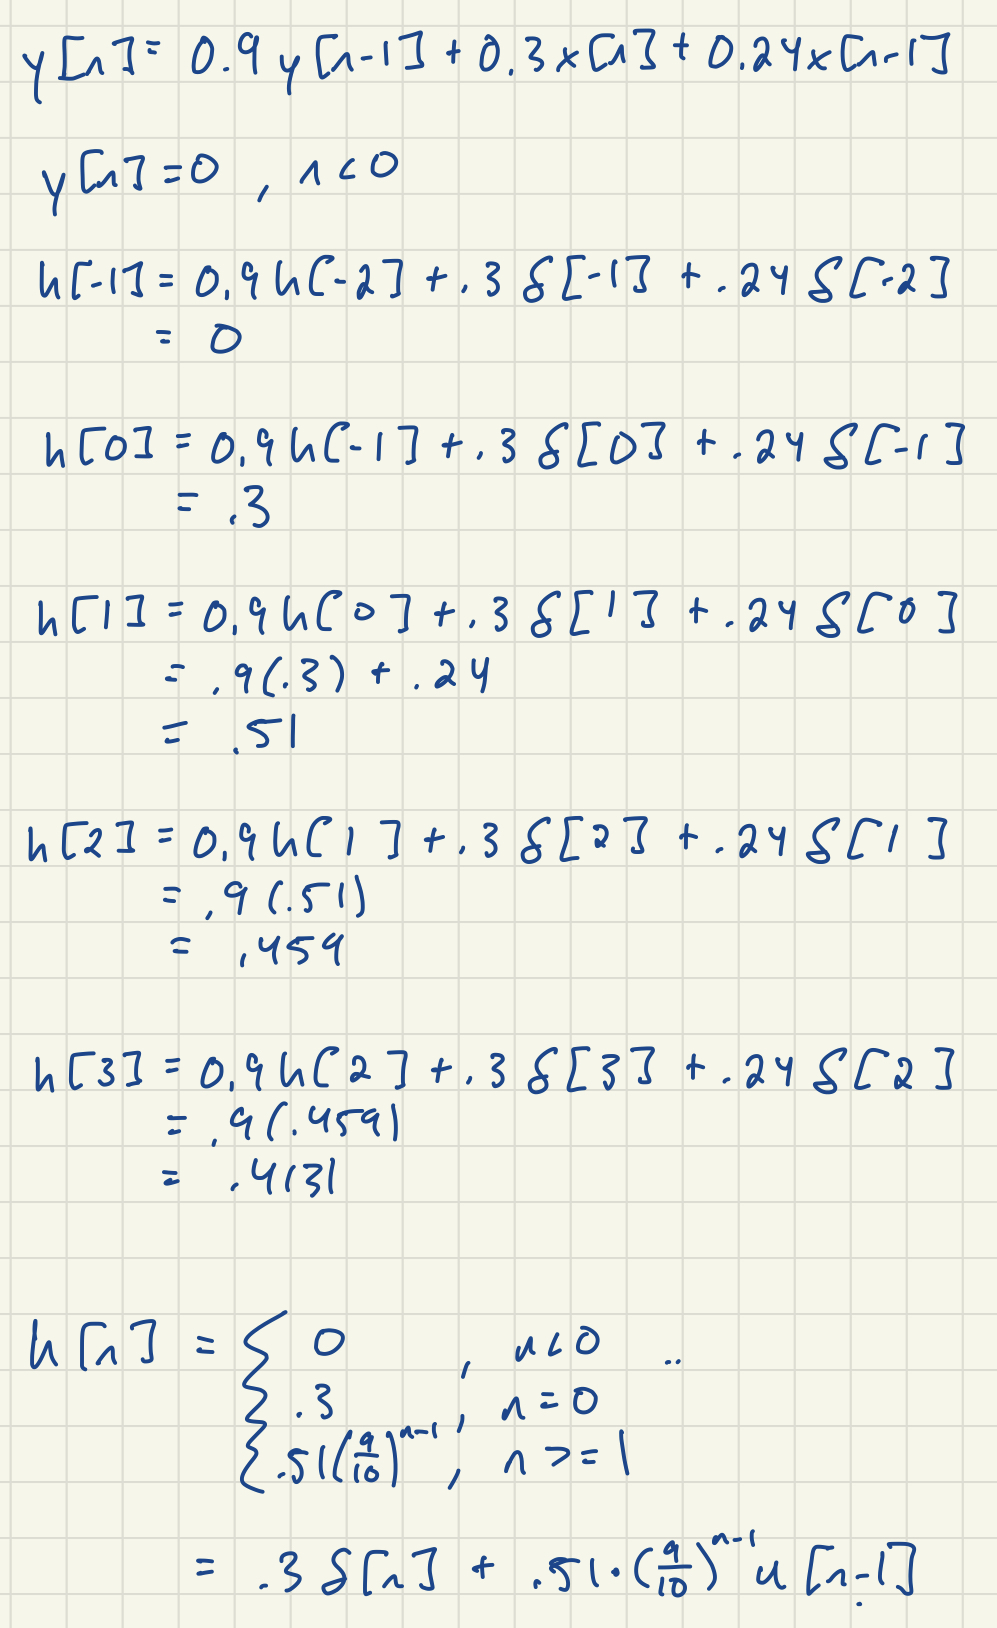

**3. Use your answer in Q2 to obtain the frequency response of the system.**

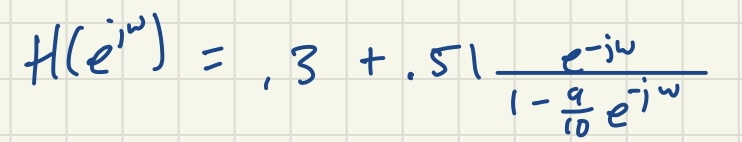

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

Note: Q3 and Q4 do not look the same. I checked that they are equal by using Python. If that is not enough, you can uncomment Hw1 in Q5 and check. I compared Hw and Hw1 in python by comparing Hw(omega) and Hw1(omega) values and graphed both magnitude and phase responses.

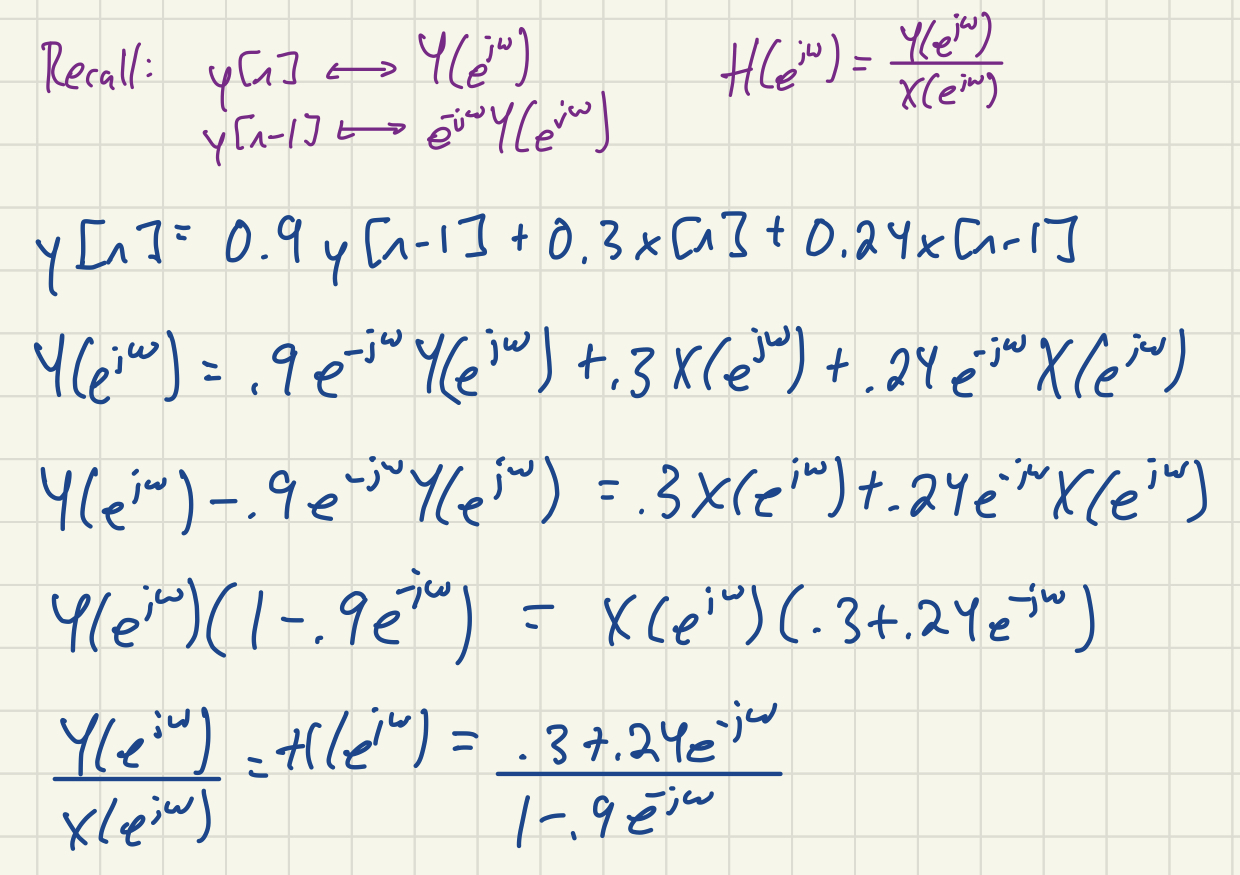





**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

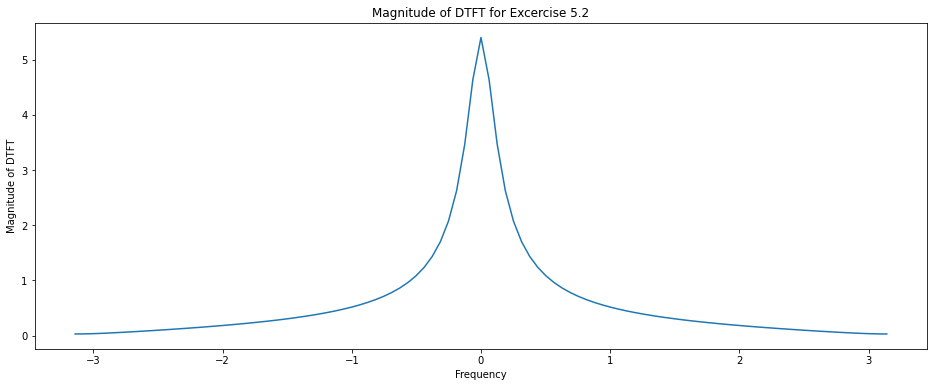

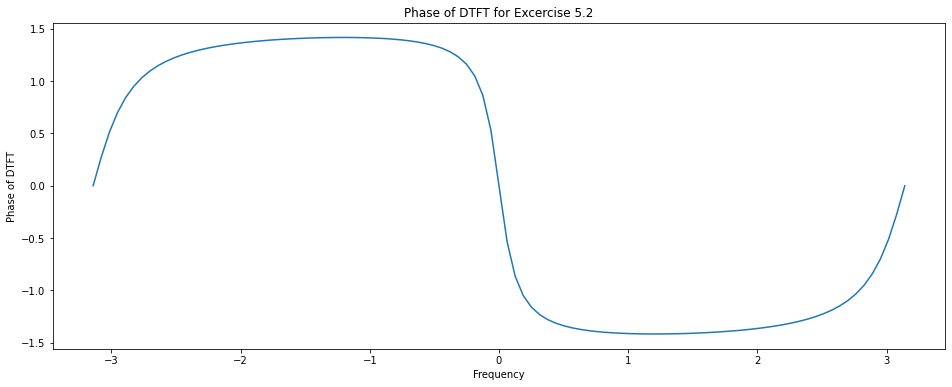

In [56]:
# write your code here
w = np.linspace(-np.pi, np.pi, 101)
Hw = .3 + .51 * (  (  np.exp(-1j*w)  )  /  (  1 - .9*np.exp(-1j*w)  )   )
#Hw1 = (  (  .3+.24*np.exp(-1j*w)  )  /  (  1-.9*np.exp(-1j*w)  )  )

plt.title("Magnitude of DTFT for Excercise 5.2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude of DTFT")
plt.plot(w, np.abs(Hw))
plt.show()

plt.title("Phase of DTFT for Excercise 5.2")
plt.xlabel("Frequency")
plt.ylabel("Phase of DTFT")
plt.plot(w, np.angle(Hw))
plt.show()


<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

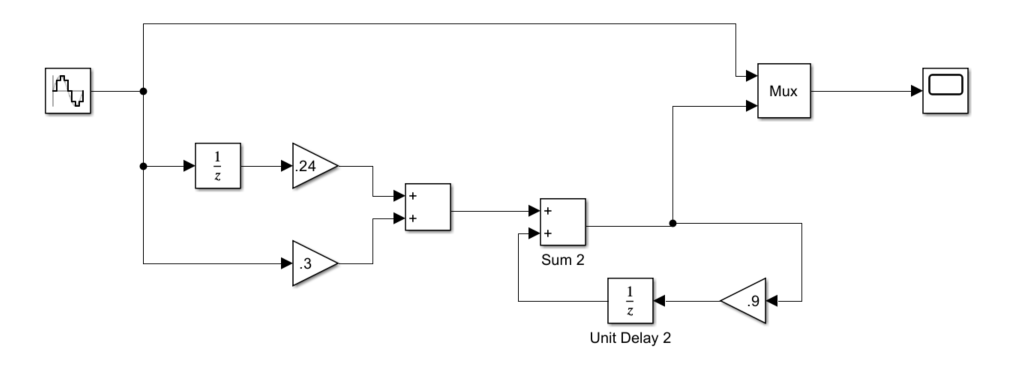

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |    2.54          |   2.55                 |
|  $\pi/8$ |     1.37         |       1.38             |
|  $\pi/4$ |      .67        |            0.68        |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


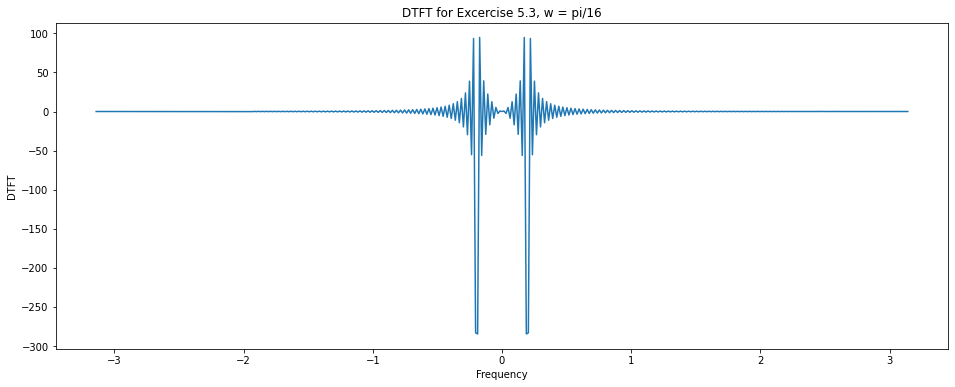

In [81]:
# write your code here
w = np.linspace(-np.pi, np.pi, 401)
n = np.linspace(-1000, 1000, 2001) # time domain x axis
n0 = n[0] # n0 aka shift of n 
Xt_pi16 = np.sin(np.pi/16 * n)

Xw_pi16 = DTFT(Xt_pi16, n0, w)
Hw = .3 + .51 * (  (  np.exp(-1j*w)  )  /  (  1 - .9*np.exp(-1j*w)  )   )
Yw = Xw_pi16 * Hw

plt.title("DTFT for Excercise 5.3, w = pi/16")
plt.xlabel("Frequency")
plt.ylabel("DTFT")
plt.plot(w, Yw)
plt.show()

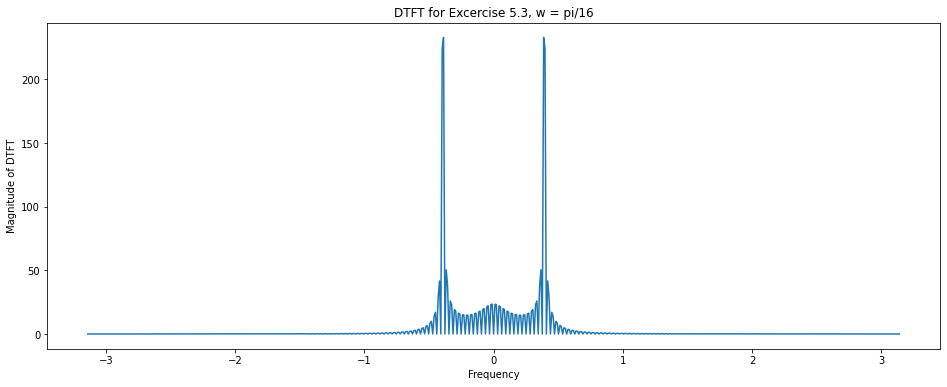

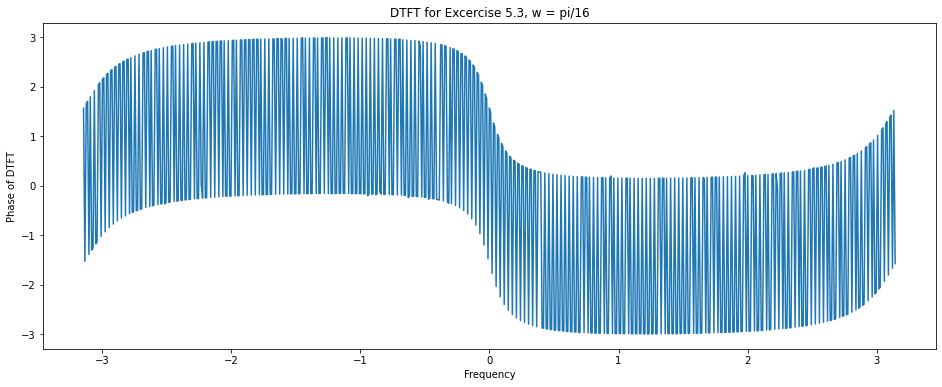

In [61]:
plt.title("DTFT for Excercise 5.3, w = pi/16")
plt.xlabel("Frequency")
plt.ylabel("Magnitude of DTFT")
plt.plot(w, np.abs(Yw))
plt.show()

plt.title("DTFT for Excercise 5.3, w = pi/16")
plt.xlabel("Frequency")
plt.ylabel("Phase of DTFT")
plt.plot(w, np.angle(Yw))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


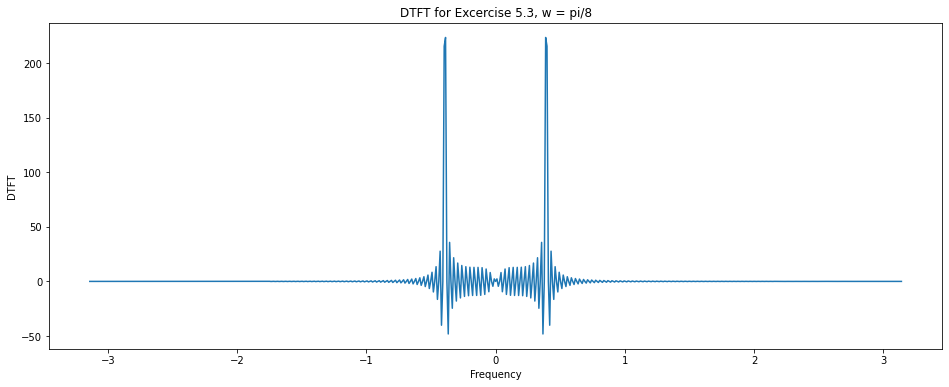

In [87]:
# write your code here
w = np.linspace(-np.pi, np.pi, 601)
n = np.linspace(-1000, 1000, 2001) # time domain x axis
n0 = n[0] # n0 aka shift of n 
Xt_pi16 = np.sin(np.pi/8 * n)

Xw_pi16 = DTFT(Xt_pi16, n0, w)
Hw = .3 + .51 * (  (  np.exp(-1j*w)  )  /  (  1 - .9*np.exp(-1j*w)  )   )
Yw = Xw_pi16 * Hw

plt.title("DTFT for Excercise 5.3, w = pi/8")
plt.xlabel("Frequency")
plt.ylabel("DTFT")
plt.plot(w, Yw)
plt.show()

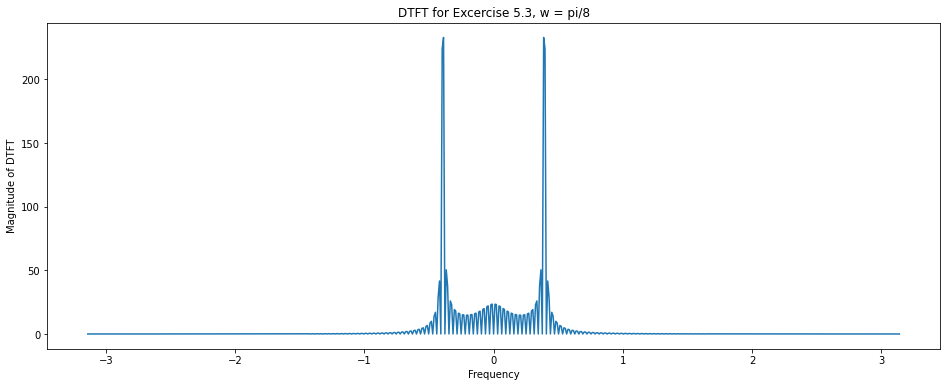

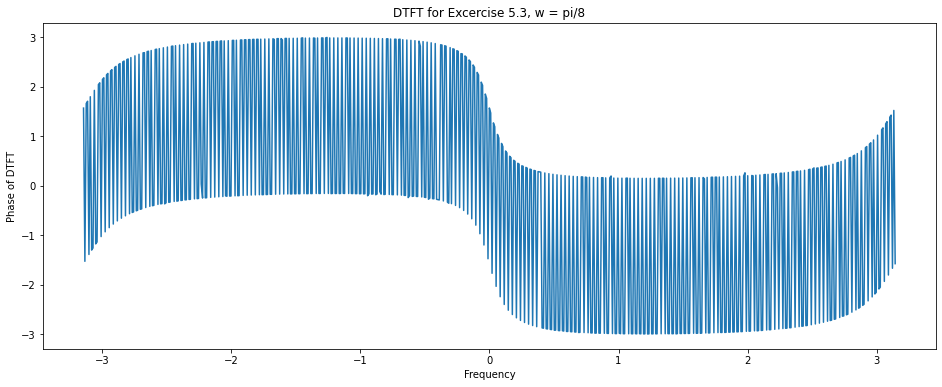

In [60]:
plt.title("DTFT for Excercise 5.3, w = pi/8")
plt.xlabel("Frequency")
plt.ylabel("Magnitude of DTFT")
plt.plot(w, np.abs(Yw))
plt.show()

plt.title("DTFT for Excercise 5.3, w = pi/8")
plt.xlabel("Frequency")
plt.ylabel("Phase of DTFT")
plt.plot(w, np.angle(Yw))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


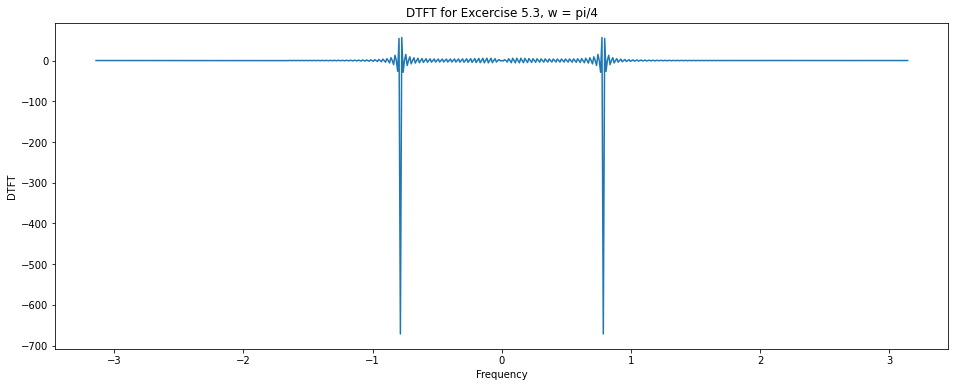

In [94]:
# write your code here
w = np.linspace(-np.pi, np.pi, 601)
n = np.linspace(-1000, 1000, 2001) # time domain x axis
n0 = n[0] # n0 aka shift of n 
Xt_pi16 = np.sin(np.pi/4 * n)

Xw_pi16 = DTFT(Xt_pi16, n0, w)
Hw = .3 + .51 * (  (  np.exp(-1j*w)  )  /  (  1 - .9*np.exp(-1j*w)  )   )
Yw = Xw_pi16 * Hw

plt.title("DTFT for Excercise 5.3, w = pi/4")
plt.xlabel("Frequency")
plt.ylabel("DTFT")
plt.plot(w, Yw)
plt.show()

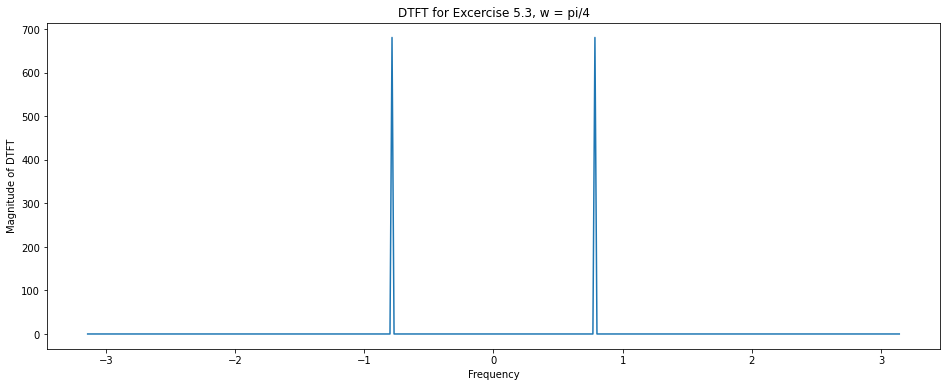

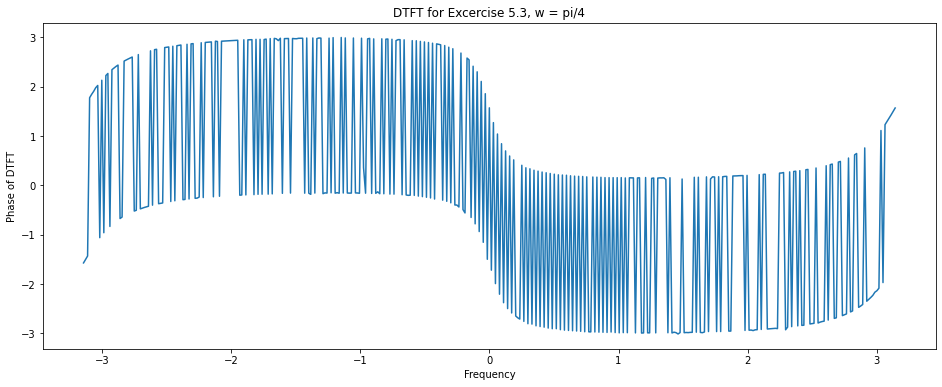

In [76]:
plt.title("DTFT for Excercise 5.3, w = pi/4")
plt.xlabel("Frequency")
plt.ylabel("Magnitude of DTFT")
plt.plot(w, np.abs(Yw))
plt.show()

plt.title("DTFT for Excercise 5.3, w = pi/4")
plt.xlabel("Frequency")
plt.ylabel("Phase of DTFT")
plt.plot(w, np.angle(Yw))
plt.show()